# MVP Análise de Dados e Boas Práticas

**Nome:** Leandro Loriato

**Matrícula:** 4052025000318

**Dataset:** [Global AI Job Market & Salary Trends 2025](https://raw.githubusercontent.com/llrt/pos_dados_puc_rio-mvp_sprint_analise_dados/refs/heads/main/data/ai_job_dataset.csv)

**Problema:** Regressão Supervisionada


OBS geral: o notebook e respectivo código serão apresentados todos em português (pt-br), exceto pelo nome das colunas do dataset, que será mantido no original em inglês (en-us) para não gerar confusão ao leitor.

# Descrição do Dataset e Problema Proposto

O conjunto de dados utilizado neste problema é o *Global AI Job Market & Salary Trends 2025*, disponibilizado originalmente no [Kaggle](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025) . O dataset contempla registros de vagas ao redor do mundo para trabalho com AI, juntamente com suas características e o respectivo salário, em USD e moeda local.

O problema proposto é então, a partir das propriedades de uma dada vaga, prever qual o salário que estará disponível naquela vaga. Trata-se portanto de um problem de **Regressão**. Como temos um dataset que já possui amostras com respectivo salário devidamente preenchido, trata-se portanto de um problema de **Aprendizado Supervisionado**. Assim, temos então que se trata de um problema **Regressão Supervisionada**.

## Atributos do Dataset

O dataset contém 15000 instâncias, contendo os seguintes atributos (features):

- *job_id*: id único que identifica aquela vaga - não é relevante para a análise, vamos descartar
- *job_title* (variável categórica nominal): título daquela vaga (talvez requeira algum processamento/padronização)
- *experience_level* (variável categórica ordinal): nível de senioridade daquela vaga (*EN* (entry-level) < *MI* (mid-level) < *SE* (senior-level) < *EX* (executive level) )
- *employment_type* (variável categórica nominal): tipo de emprego (*FT* (full-time), *PT* (part-time), *CT* (contract), *FL* (freelance) )
- *company_name* (variável categórica nominal): nome da empresa daquela vaga (talvez requeira algum processamento/padronização)
- *company_location* (variável categórica nominal): país daquela vaga
- *company_size* (variável categórica ordinal): tamanho da empresa daquela vaga (*S* (small-sized company, < 50 empregados) < *M* (medium-sized company, 50-250 empregados) < *L* (large-sized company, > 250 empregados ))
- *employee_residence* (variável categórica nominal): país do empregado para a qual a vaga foi proposta
- *remote_ratio* (variável categórica ordinal): tipo de trabalho, em % remoto (*0* (trabalho presencial) < *50* (remoto parcial, híbrido) < *100* (remoto full))
- *required_skills* (variável categórica nominal): top 5 habilidades solicitadas para aquela vaga - como é um campo texto livre e separado por vírgulas - deve requerer algum processamento/padronização
- *education_required* (variável categórica ordinal): nível de educação mínimo requerido para aquela vaga (*Associate* (graduação incompleta) < *Bachelor* (graduação completa) < Master (mestrado) < PhD (doutorado) )
- *years_experience* (variável inteira): número de anos de experiência requeridos para aquela vaga
- *industry* (variável categórica nominal): setor da empresa daquela vaga
- *posting_date* (variável temporal): data em que vaga foi proposta
- *application_deadline* (variável temporal): data limite para aplicar-se na vaga
- *job_description_length* (variável inteira): tamanho em caracteres da descrição da vaga
- *benefits_score* (variável contínua): score de classificação dos benefícios ofertados na vaga (de 1.0 a 10.0)
- *salary_currency* (variável categórica nominal): sigla da moeda original do salário da vaga (e.g. EUR, USD, etc)

Além destas, temos a seguinte variável alvo (target):
- *salary_usd* (variável contínua): salário da vaga, em base anual e em dólares americanos (USD)

## Seleção de Dados

O dataset *Global AI Job Market & Salary Trends 2025* é um conjunto de dados disponível abertamente na plataforma Kaggle, podendo ser baixado diretamente da plataforma como CSV neste [link](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025). É um conjunto curado e pronto para uso, não sendo necessária nenhuma preparação/transformação (ETL) dos dados, apenas sua carga simples.

## Suposições/Premissas e Hipóteses

De início, podemos assumir algumas suposições/premissas basilares:

- que a amostra apresentada no dataset em questão é bem representativa do universo real das vagas da área de AI, em termos de distribuição das vagas nos vários segmentos/aspectos representados nas variáveis - sob essa suposição, podemos considerar como válidas as distribuições da amostra em termos das variáveis categóricas, ainda que em alguns casos haja desbalanceamento entre as classes, sendo esse desbalanceamento de fato encontrado no universo real geral das vagas
- que a distribuição dos salários, embora desconhecida, seja estacionária no tempo, i.e. que não mude de forma (não passe de um tipo de distribuição para outro) ao longo do tempo, ainda que seus parâmetros (média, variância, etc) mudem, por ex por um aumento seguindo inflação ou crescimento econômico ao longo dos anos - sob essa suposição, podemos analisar a distribuição dos salários de forma geral, não precisando analisar sua mudança ao longo do tempo, já que não estamos interessados em saber se os salários cresceram ou não ao longo do tempo, mas sim em identificar os fatores que mais os influenciam


Postas as suposições/premissas acima, dado o contexto do problema e meu (pouco) conhecimento sobre o tema, considero algumas hipóteses:

- vagas com maior senioridade/que exijam mais anos de experiência pagam mais que vagas com menor senioridade/com exigência de menos anos de experiência - essa também é bem óbvia, quanto maior a experiência, mais espera-se que seja pago ao profissional
- vagas em nível executivo pagam mais que vagas não executivas - também bastante óbvia, dado o grau de responsabilidade e alto risco associado às vagas executivas, normal esperar que paguem mais
- vagas full time em geral pagam mais que empregos part time ou terceirizados o freelances - essa é bem óbvia, vagas que empregam diretamente a pessoa por mais tempo devem pagar mais que outras
- vagas para os Estados Unidos em geral pagam mais que vagas para a Europa, que por sua vez pagam mais que vagas na América do Sul ou outros lugares - o mercado americano é reconhecido por salários que pagam várias centenas de dólares anuais, mais que na Europa onde os salários são bem mais achatados, e muito mais que em outros países, que pagam numericamente em moeda local valores similares à Europa mas com moeda bem menos valorizada
- vagas pagam de forma diferenciada quando o profissional vem de um país com moeda mais forte ou mais baixa - a ideia aqui é que as empresas buscam pagar de forma competitiva com os mercados de origem do profissional, considerando o país daonde ele vem, pagando menos para um brasileiro que trabalha remoto para os EUA do que para um americano lá
- Big Techs e outras empresas de renome pagam provavelmente muito acima de outras, mas fora esses casos o nome da empresa em geral não influencia muito o salário
- se a vaga é remota, híbrida ou presencial, ou se a descrição do emprego é sofisticada ou não, podem até influenciar o salário pago, mas de forma mais residual

Considerando as hipóteses acima, ppodemos esperar então que:

- as variáveis *company_size*, *industry*, *company_location*, *employee_residence*, *employment_type*, *experience_level* e *years_experience* tenham grande influência no target *salary_usd*
- as variáveis *salary_currency*, *company_name*, *remote_ratio* e *job_description_length* possam ter influência no target *salary_usd*, mas pouca
- *experience_level* e *years_experience* devem ter alta correlação, porque *experience_level* está normalmente relacionada ao nr de anos que a pessoa já trabalhou no mercado
- as variáveis temporais *posting_date* e *application_deadline* influenciam mas não drasticamente o target *salary_usd*

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [1]:
# bibliotecas (libraries, libs) para manipulação de dataframes
import pandas as pd
import numpy as np

# libs para criação de gráficos (plotting)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.plotting as pdplt

#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.decomposition import PCA
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline

In [2]:
url_dados = "https://raw.githubusercontent.com/llrt/pos_dados_puc_rio-mvp_sprint_analise_dados/refs/heads/main/data/ai_job_dataset.csv"

df = pd.read_csv(url_dados)

Leitura das primeiras linhas, para verificar que carregou corretamente os dados:

In [3]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

### Dimensões, tipos dos atributos e dados faltantes:

Vamos começar avaliando o dataset olhando quais as dimensões e quais os tipos dos atributos:

#### Dimensões

In [4]:
print("Dimensões:\n")
df.shape

Dimensões:



(15000, 19)

#### Tipo dos atributos

In [5]:
print("Tipos dos atributos:\n")
df.dtypes

Tipos dos atributos:



,0
job_id,object
job_title,object
salary_usd,int64
salary_currency,object
experience_level,object
employment_type,object
company_location,object
company_size,object
employee_residence,object
remote_ratio,int64


Conforme antecipado na seção "Atributos do Dataset" acima, temos 15000 instâncias neste dataset. Com relação às colunas/atributos, exceto pelas colunas *remote_ratio*, *years_experience* (ambas inteiras) e *benefits_score* (decimal), todas as demais variáveis de entrada são categóricas.

Curiosamente, apesar de estarmos falando de salário, a variável target *salary_usd* também foi considerada pela pandas como inteira, porque não possui nos seus valores no dataset nenhum caso com casa decimal.

#### Dados faltantes

In [6]:
print("Totais de dados faltantes, por atributo:\n")

df.isnull().sum()

Totais de dados faltantes, por atributo:



,0
job_id,0
job_title,0
salary_usd,0
salary_currency,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0
remote_ratio,0


Como podemos ver, neste dataset não há nenhum registro com dados faltantes, em nenhuma coluna.

#### Dados duplicados

In [7]:
print("Totais de dados faltantes, por atributo:\n")

any(df.duplicated())

Totais de dados faltantes, por atributo:



False

Como podemos ver, neste dataset não há nenhum registro duplicado (i.e. com todos os valores iguais a algum outro).

## Ajuste dos tipos das variáveis categóricas

Ao importar e inferir de forma automática os tipos de dados (dtypes) de um dataset qq, o Pandas não consegue distinguir entre campos verdadeiramente categóricas e campos apenas string. Por isso, ele importa em geral campos que não sejam numéricos (integer ou float) como object. Nós porém sabemos já que algumas das colunas são certamente categóricas e outras provavelmente também são, de forma que podemos marcar explicitamente essas colunas como categóricas.

Marcar colunas como categóricas tem a vantagem de facilitar análises de dados posteriores via gráficos, por ex ordenando de maneira específica os valores categóricos encontrados.

In [8]:
# para facilitar, vamos definir uma função reusável que, dado um dataframe e o nome de uma coluna, transforma ela em categórica
# vamos aproveitar e também já prever o caso de categórica ordinal, caso uma ordem seja passada

def converte_categorica(df, coluna, ordem=None):
  df[coluna] = df[coluna].astype('category')

  if ordem:
    df[coluna] = pd.Categorical(df[coluna], categories=ordem, ordered=True)

  return df


# printar os tipos antes da conversão
print("Tipos dos atributos antes da conversão de categóricas:\n")
print(df.dtypes)

df = converte_categorica(df, 'job_title')
df = converte_categorica(df, 'experience_level', ['EN', 'MI', 'SE', 'EX'])
df = converte_categorica(df, 'employment_type')
df = converte_categorica(df, 'company_name')
df = converte_categorica(df, 'company_location')
df = converte_categorica(df, 'company_size', ['S', 'M', 'L'])
df = converte_categorica(df, 'employee_residence')
df = converte_categorica(df, 'remote_ratio', [0, 50, 100])
df = converte_categorica(df, 'required_skills')
df = converte_categorica(df, 'education_required', ['Associate', 'Bachelor', 'Master', 'PhD'])
df = converte_categorica(df, 'industry')
df = converte_categorica(df, 'salary_currency')

Tipos dos atributos antes da conversão de categóricas:

job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            float64
company_name               object
dtype: object


In [9]:

# printar os tipos depois da conversão, para ver se deu td certo
print("Tipos dos atributos depois da conversão de categóricas:\n")
print(df.dtypes)

Tipos dos atributos depois da conversão de categóricas:

job_id                      object
job_title                 category
salary_usd                   int64
salary_currency           category
experience_level          category
employment_type           category
company_location          category
company_size              category
employee_residence        category
remote_ratio              category
required_skills           category
education_required        category
years_experience             int64
industry                  category
posting_date                object
application_deadline        object
job_description_length       int64
benefits_score             float64
company_name              category
dtype: object


## Ajuste dos tipos das variáveis temporais

Da mesma forma que com variáveis categóricas, ao importar e inferir de forma automática os tipos de dados (dtypes) de um dataset qq, o Pandas também não consegue distinguir entre campos temporais (date or datetime) e campos apenas string. Nós porém também já sabemos que algumas das colunas são certamente temporais, então podemos marcar explicitamente essas colunas como date or datetime.

Apesar de fora do escopo deste trabalho, ao marcar estas colunas como date/datetime nós conseguiríamos realizar análises avançadas do tipo time series.

In [10]:
# para facilitar, vamos definir uma função reusável que, dado um dataframe e o nome de uma coluna, transforma ela em date/datetime, podendo ser passado um formato opcional de data (caso não passe, assumiremos formato ISO, yyyy-mm-dd)

def converte_data(df, coluna, formato="%Y-%m-%d"):
  df[coluna] = pd.to_datetime(df[coluna], format=formato, errors='coerce')

  return df

df = converte_data(df, 'posting_date')
df = converte_data(df, 'application_deadline')

In [11]:
# printar os tipos depois da conversão, para ver se deu td certo
print("Tipos dos atributos depois da conversão de temporais:\n")
print(df.dtypes)

Tipos dos atributos depois da conversão de temporais:

job_id                            object
job_title                       category
salary_usd                         int64
salary_currency                 category
experience_level                category
employment_type                 category
company_location                category
company_size                    category
employee_residence              category
remote_ratio                    category
required_skills                 category
education_required              category
years_experience                   int64
industry                        category
posting_date              datetime64[ns]
application_deadline      datetime64[ns]
job_description_length             int64
benefits_score                   float64
company_name                    category
dtype: object


## Análises de variáveis quantitativas/numéricas

De início, vamos recuperar as estatísticas principais de cada variável/atributo:

In [12]:
df.describe() # retorna as estatísticas principais (média, desvio padrão, mínimo, máximo, quartis) das variáveis numéricas

,salary_usd,years_experience,posting_date,application_deadline,job_description_length,benefits_score
count,15000.000000,15000.000000,15000,15000,15000.000000,15000.000000
mean,115348.965133,6.253200,2024-08-29 08:48:51.840000,2024-10-11 21:55:23.520000,1503.314733,7.504273
min,32519.000000,0.000000,2024-01-01 00:00:00,2024-01-16 00:00:00,500.000000,5.000000
25%,70179.750000,2.000000,2024-04-29 00:00:00,2024-06-13 00:00:00,1003.750000,6.200000
50%,99705.000000,5.000000,2024-08-28 00:00:00,2024-10-12 00:00:00,1512.000000,7.500000
75%,146408.500000,10.000000,2024-12-29 00:00:00,2025-02-10 00:00:00,2000.000000,8.800000
max,399095.000000,19.000000,2025-04-30 00:00:00,2025-07-11 00:00:00,2499.000000,10.000000
std,60260.940438,5.545768,NaN,NaN,576.127083,1.450870


De cara, vemos que as variáveis *job_description_length* e *salary_usd* possuem muitos valores arbitrariamente altos, indicando necessidade de normalização/padronização. *salary_usd* porém é o target - avaliar se faz sentido normalizar/padronizar, visto que a predição acabaria sendo feita na nova escala, não na antiga (pode não ser um problema, já que há funções para inverter a transformação e obter o que seria o valor original correspondente).

Outras colunas como *years_experience* e *benefits_score* também poderiam se beneficiar de uma padronização de escala - a ver.

A seguir, vamos analisar individualmente cada variável numérica. Nossa principal preocupação é observar suas distribuições, identificar necessidades de padronização/normalização e de tratamento de outliers.

Antes de começar, vamos definir algumas configurações e funções úteis.

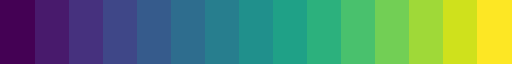

In [13]:
# definir paleta de cor viridis para uso nos gráficos
numero_elementos = 15

vcmap = plt.get_cmap("viridis", numero_elementos)
display(vcmap)

cores_viridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(numero_elementos)] # extrai lista de cores em hex


In [14]:
# utiliza stylesheet do ggplot
plt.style.use("ggplot")

# modifica alguns parâmetros para ficar mais palatável (o original do ggplot é muito feio)
plt.rc("axes", facecolor="#fafafa", grid=True)
plt.rc("grid", color = "#e1e1e1")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

In [15]:
def gera_grafico_histograma(df, coluna, bins=15, figsize=(10, 5), cor="#2E4057"):
  # config inicial da visualização
  fig, ax = plt.subplots(figsize=figsize)

  # constrói histograma (qtd de bins ajustada manualmente para melhor visualização)
  num_bins = 20
  ax.hist(df[coluna], bins=bins, color=cor)

  # define os ticks para o eixo x
  ax.set_xticks( range( max(0, int(df[coluna].min())-3), int(df[coluna].max())+3, (int( df[coluna].max() ) - int( df[coluna].min() ) )//bins ) )

  # definir título
  plt.title(f"Distribuição de {coluna}")

  # definir rótulos dos eixos
  plt.xlabel(f"{coluna}")
  plt.ylabel("freq")

  # eliminar margens desnecessárias
  plt.tight_layout()

  # exibir o gráfico
  plt.show()

In [16]:
def gera_grafico_boxplot(df, coluna, figsize=(15, 5), cor="#2E4057"):
  # config inicial da visualização
  fig, ax = plt.subplots(figsize=figsize)

  # Constrói boxplot horizontal
  bp = ax.boxplot(df[coluna], vert = False, patch_artist = True)

  # configura cores
  plt.setp(bp["boxes"], facecolor=cor)
  plt.setp(bp["medians"], color="black")

  # definir título
  plt.title(f"Boxplot de {coluna}")

  # definir rótulos dos eixos
  plt.xlabel(f"{coluna}")
  plt.ylabel("")

  # eliminar margens desnecessárias
  plt.tight_layout()

  # exibir o gráfico
  plt.show()

### salary_usd

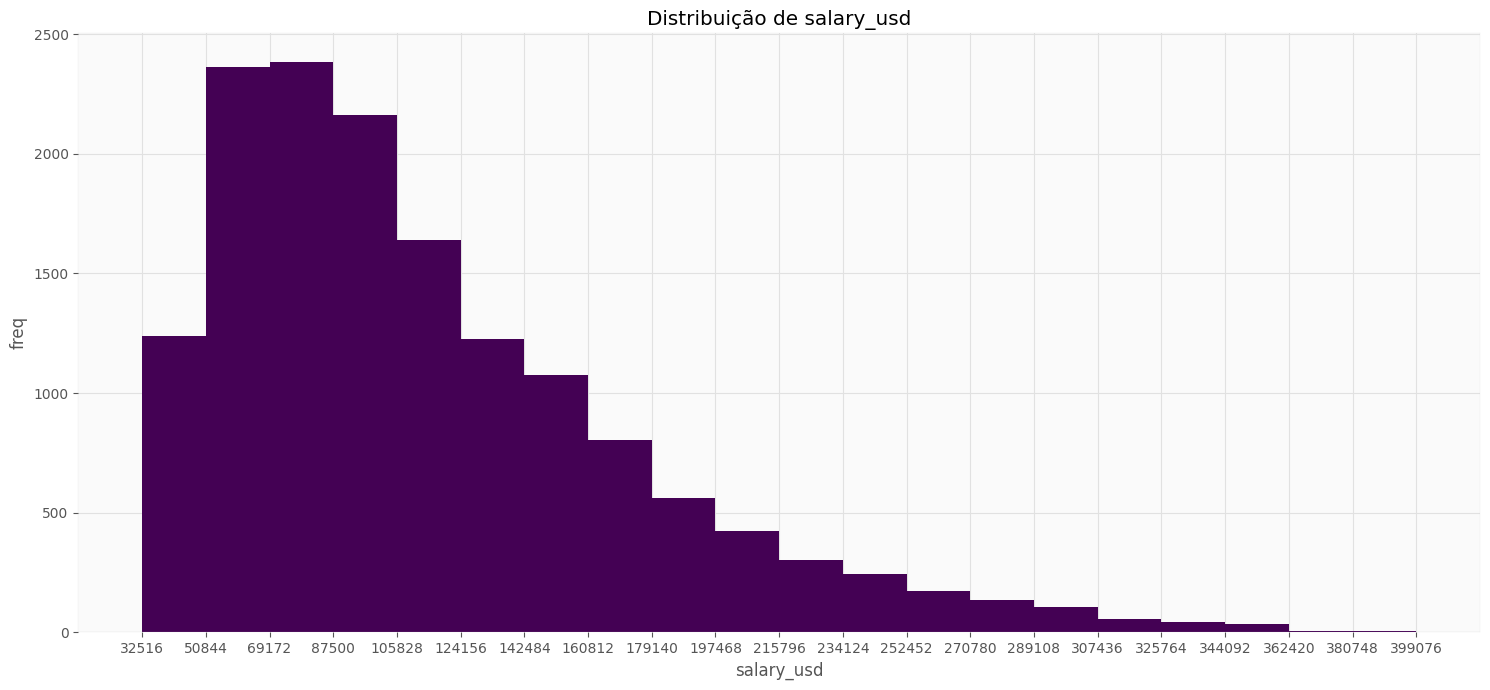

In [17]:
gera_grafico_histograma(df, 'salary_usd', bins=20, figsize=(15, 7), cor=cores_viridis[0])

Podemos ver claramente que a distribuição de *salary_usd* não é normal, mas uma distribuição assimétrica à esquerda. Nesse caso, não faz sentido fazermos padronização, talvez apenas normalização (escalar para intervalo 0 a 1). Entretanto, como dito antes, pode não fazer sentido fazer isso para esta variável, porque ela será nossa variável target.

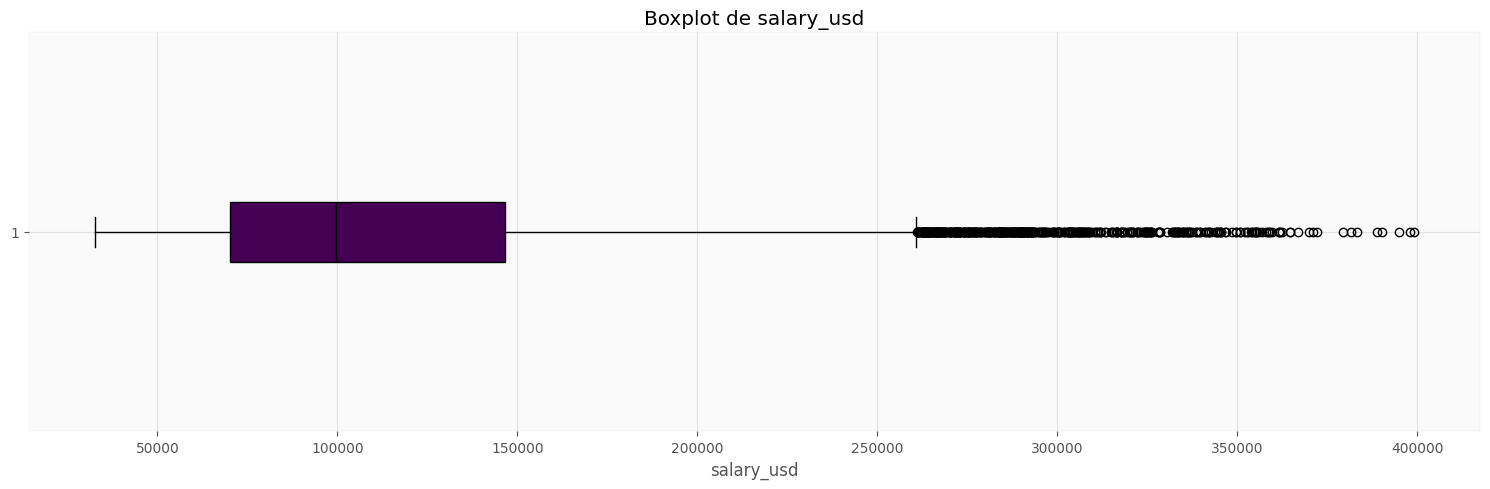

In [18]:
gera_grafico_boxplot(df, 'salary_usd', figsize=(15, 5), cor=cores_viridis[0])

Interessantemente, a partir do boxplot acima, vemos que a variável alvo tem muitos outliers. Isso pode trazer problemas para o modelo, que pode ter dificuldade em prever esses valores tão extremos . Por outro lado, é fato que salários assim de fato ocorrem e de forma não tão incomum, apenas agrupados em um subconjunto seleto de vagas . Assim, vamos optar por não retirar essas ocorrências da amostra e permitir que sejam utilizadas normalmente no sample de treino.

### years_experience

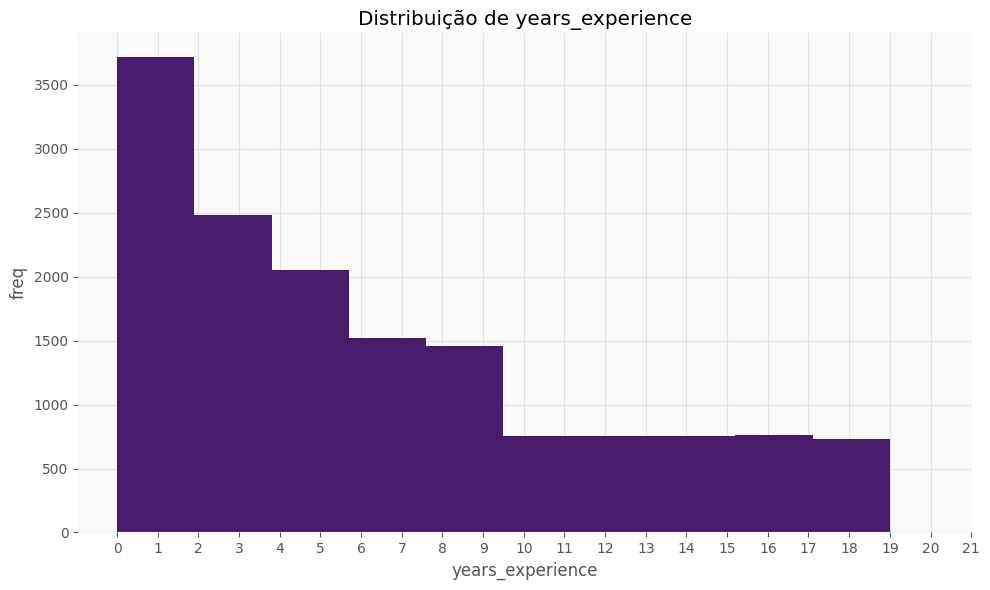

In [19]:
gera_grafico_histograma(df, 'years_experience', bins=10, figsize=(10, 6), cor=cores_viridis[1])

Podemos ver claramente que a distribuição de *years_experience* também não é normal, mas uma distribuição assimétrica à esquerda, com grande concentração em valores mais baixos. Nesse caso, também não faz sentido fazermos padronização, apenas normalização (escalar para intervalo 0 a 1).

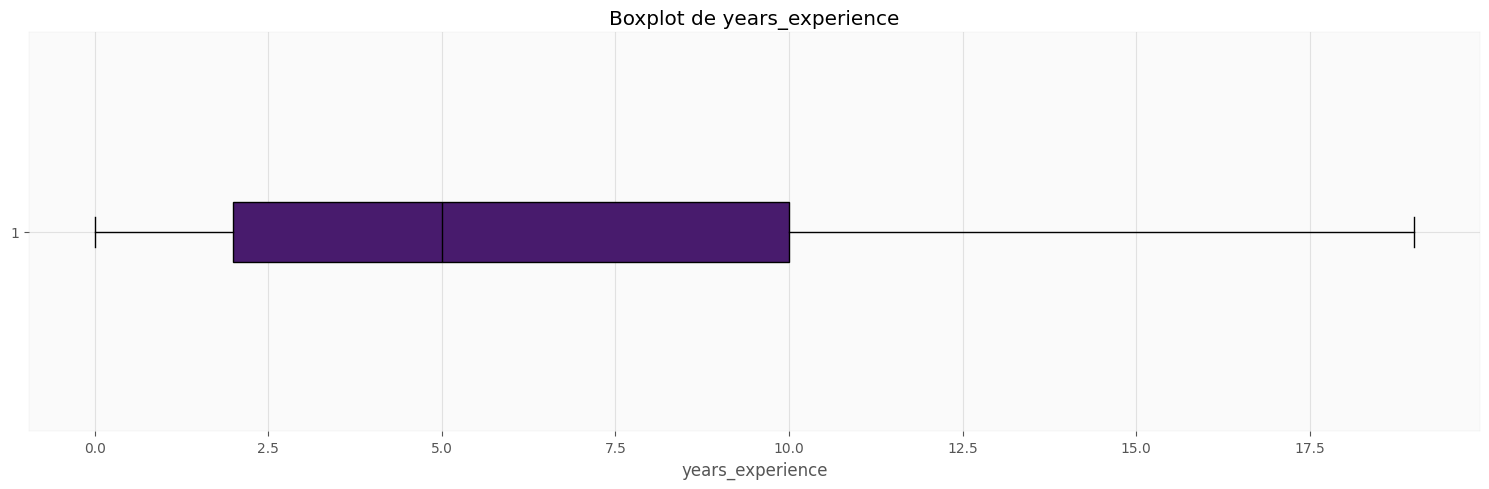

In [20]:
gera_grafico_boxplot(df, 'years_experience', figsize=(15, 5), cor=cores_viridis[1])

Pelo boxplot acima, vemos que não temos outliers nesta variável. Nada a fazer neste ponto.

### job_description_length

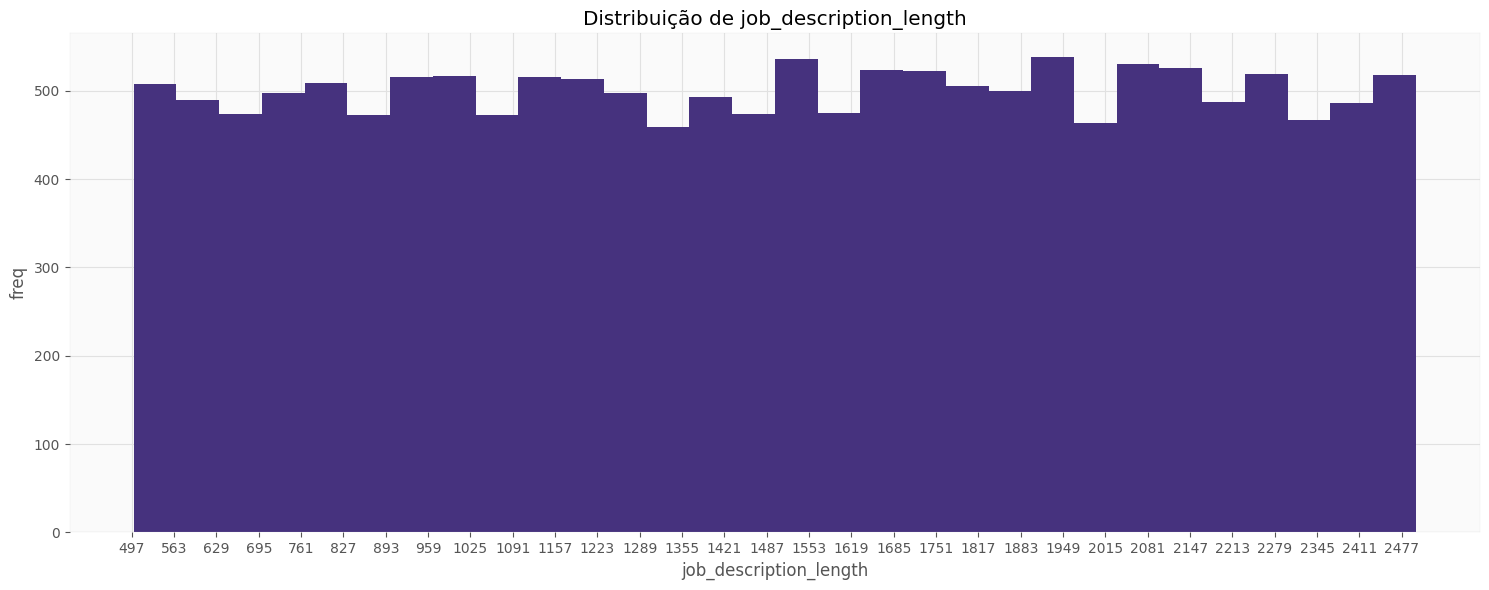

In [21]:
gera_grafico_histograma(df, 'job_description_length', bins=30, figsize=(15, 6), cor=cores_viridis[2])

Podemos ver claramente que a distribuição de *job_description_length* também não é normal, mas uma distribuição aparentemente uniforme. Nesse caso, não faz sentido fazermos padronização, apenas normalização (escalar para intervalo 0 a 1).

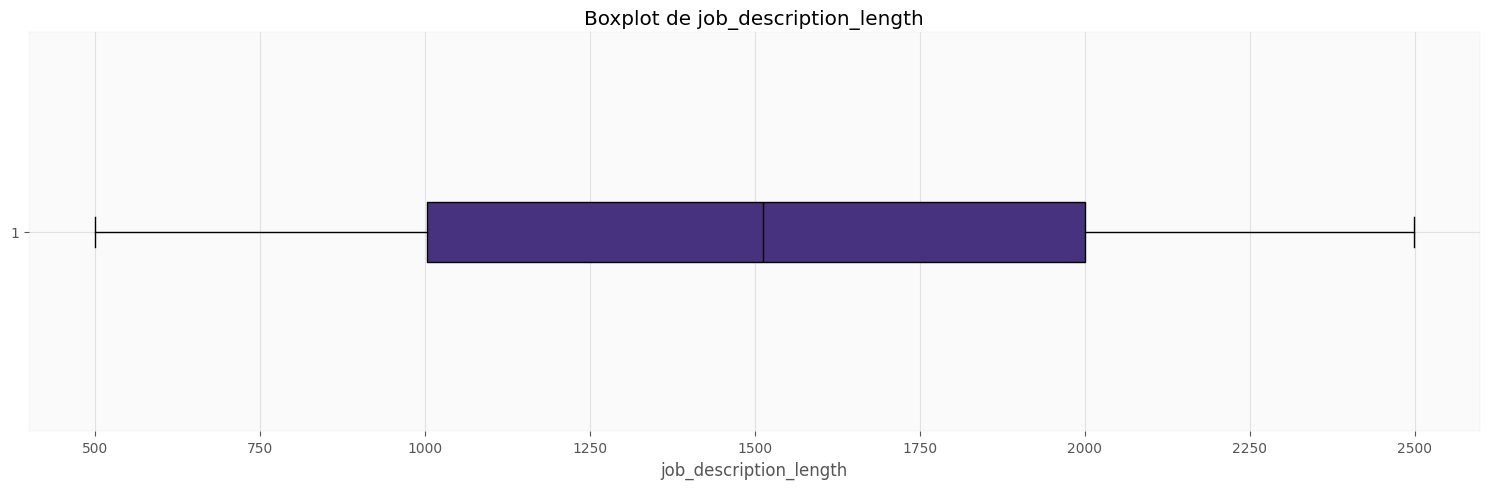

In [22]:
gera_grafico_boxplot(df, 'job_description_length', figsize=(15, 5), cor=cores_viridis[2])

Pelo boxplot acima, vemos que não temos outliers nesta variável. Nada a fazer neste ponto.

### benefits_score

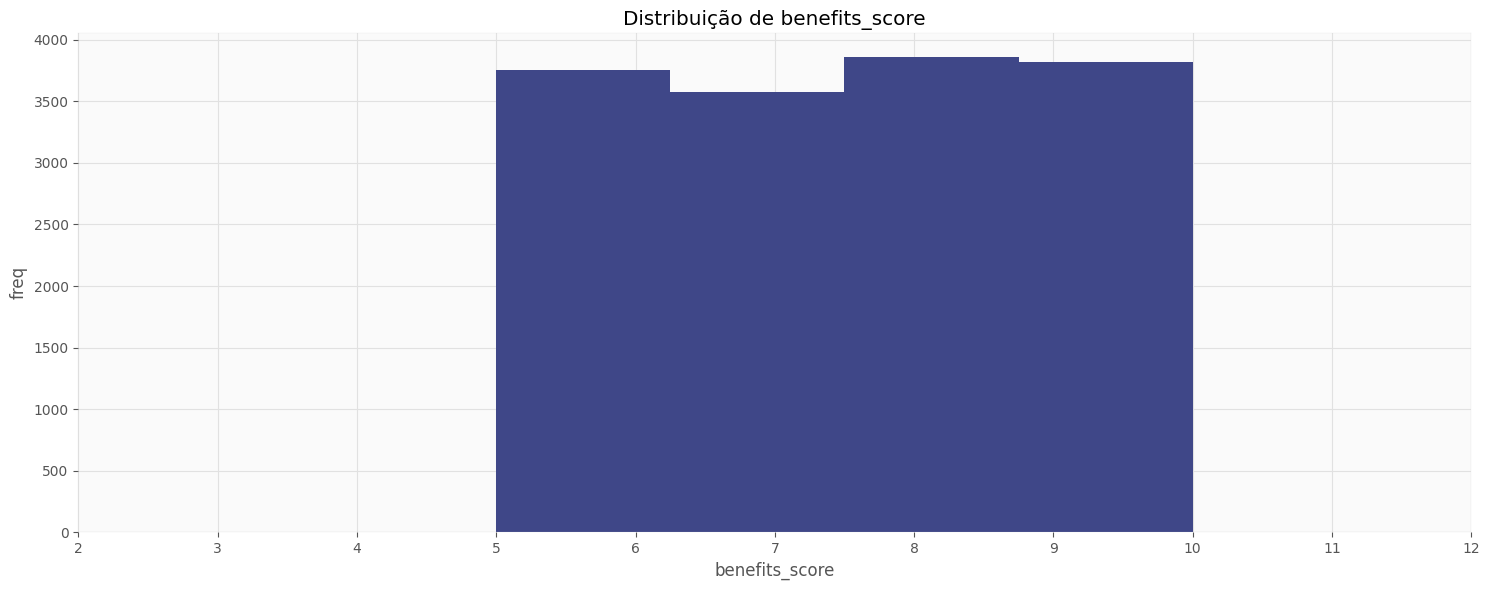

In [23]:
gera_grafico_histograma(df, 'benefits_score', bins=4, figsize=(15, 6), cor=cores_viridis[3])

Podemos ver claramente que a distribuição de *benefits_score* também não é normal, mas uma distribuição aparentemente uniforme. Nesse caso, não faz sentido fazermos padronização, apenas normalização (escalar para intervalo 0 a 1).

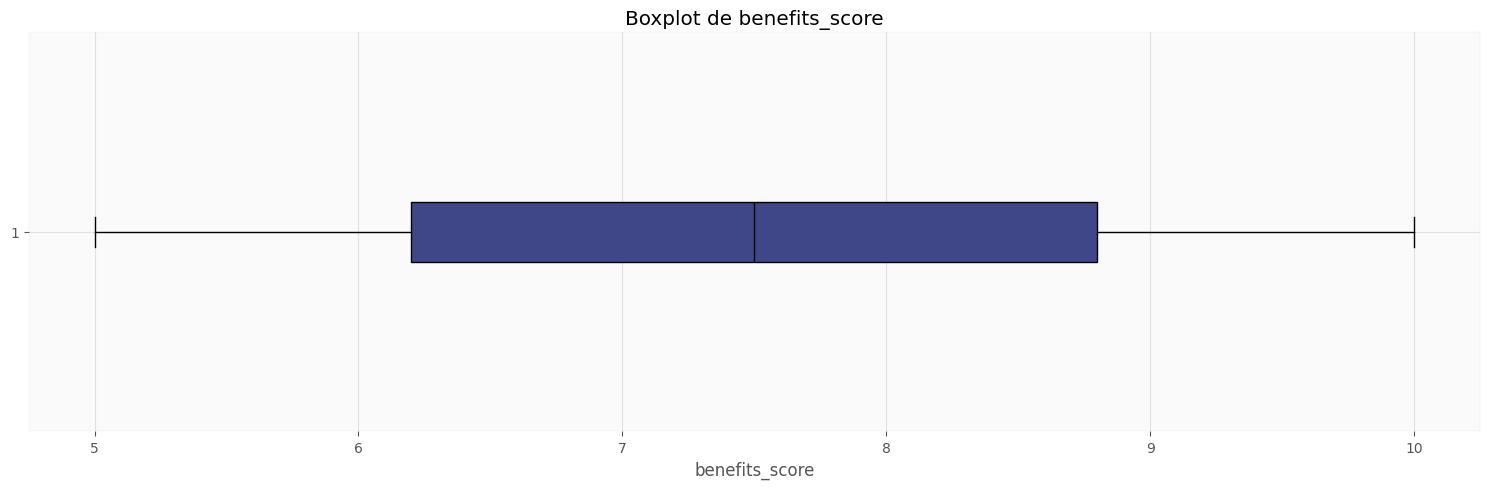

In [24]:
gera_grafico_boxplot(df, 'benefits_score', figsize=(15, 5), cor=cores_viridis[3])

Pelo boxplot acima, vemos que não temos outliers nesta variável. Nada a fazer neste ponto.

## Análises de variáveis categóricas

A seguir, vamos analisar individualmente cada variável categórica. Nossa principal preocupação é observar as frequências de cada valor e identificar eventuais problemas de balanceamento na amostra.

Antes de seguirmos, vamos definir algumas funções úteis.

In [25]:
def gera_grafico_barras_cnt(df, coluna, figsize=(10, 5), cor="#2E4057", labels_x_vertical=False, top_n=None):
  # config inicial da visualização
  fig, ax = plt.subplots(figsize=figsize)

  df_grp = df.groupby(coluna, observed=True)

  # constrói gráfico de barras
  ax.bar(
      x=df_grp.groups.keys(),
      height=df_grp.size(),
      color=cor)

  # Exibe valores sobre cada barra
  ax.bar_label(ax.containers[0], fmt="%.0f", color="#666666")

  if labels_x_vertical:
    plt.xticks(rotation=90)

  # definir título
  plt.title(f"Distribuição de {coluna}")

  # definir rótulos dos eixos
  plt.xlabel(f"{coluna}")
  plt.ylabel("freq")

  # eliminar margens desnecessárias
  plt.tight_layout()

  # exibir o gráfico
  plt.show()

### experience_level

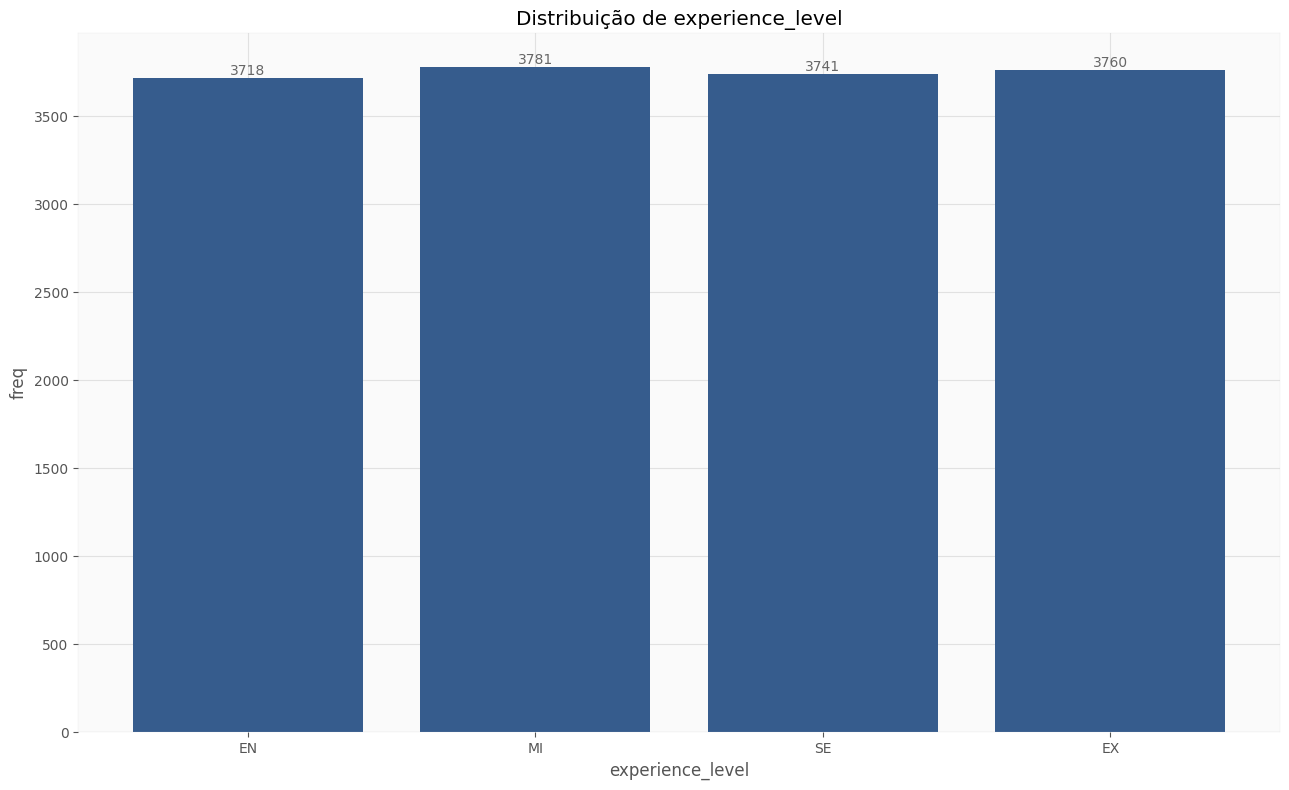

In [26]:
gera_grafico_barras_cnt(df, 'experience_level', figsize=(13, 8), cor=cores_viridis[4])

Como podemos ver, a amostra está bem distribuída em termos das várias classes de *experience_level*, não sendo observado desbalanceamento entre elas.

### employment_type

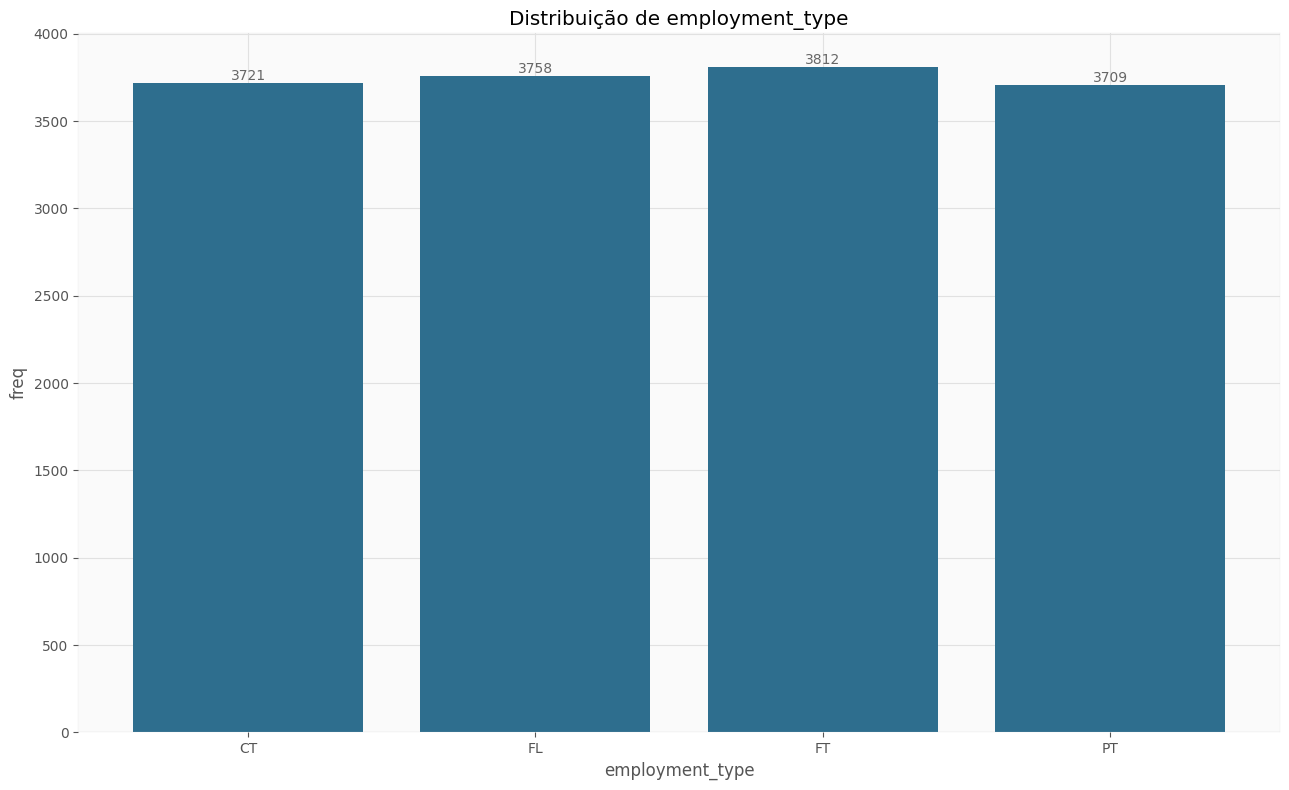

In [27]:
gera_grafico_barras_cnt(df, 'employment_type', figsize=(13, 8), cor=cores_viridis[5])

Como podemos ver, a amostra está bem distribuída em termos das várias classes de *employment_type*, não sendo observado desbalanceamento entre elas.

### company_location

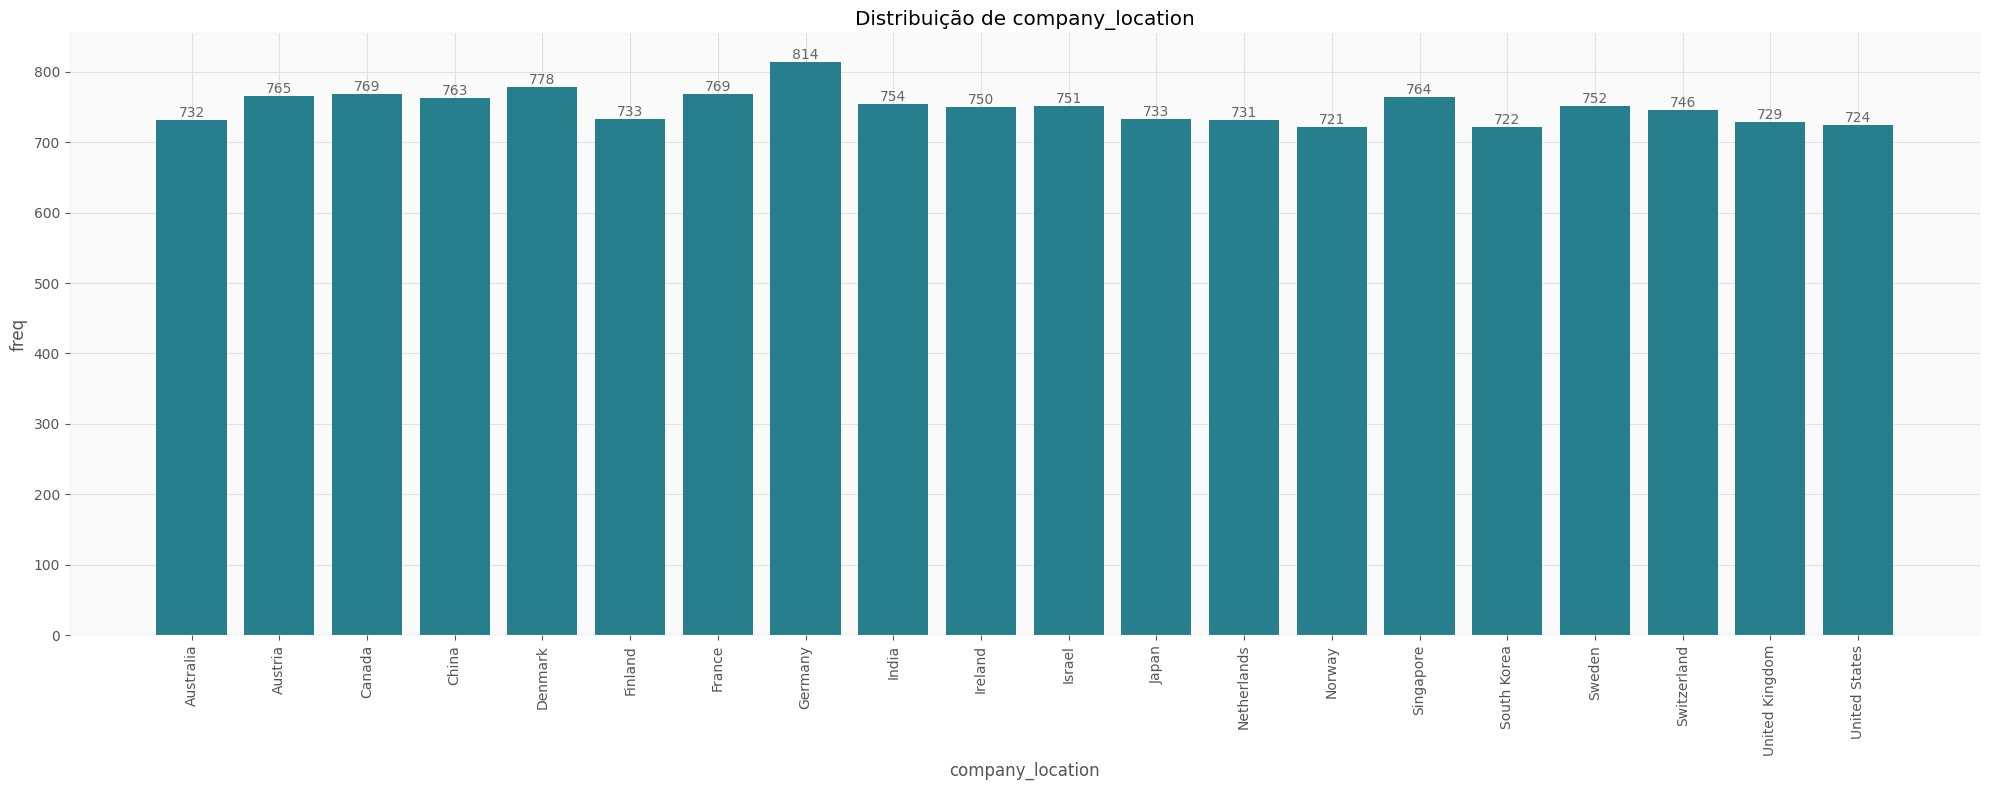

In [28]:
gera_grafico_barras_cnt(df, 'company_location', figsize=(20, 8), cor=cores_viridis[6], labels_x_vertical=True)

Como podemos ver, a amostra está bem distribuída em termos das várias classes de *company_location*. Há algumas classes que são um pouco mais frequentes que outras (como Germany), mas não chega a haver grande desbalanceamento entre elas.

### company_size

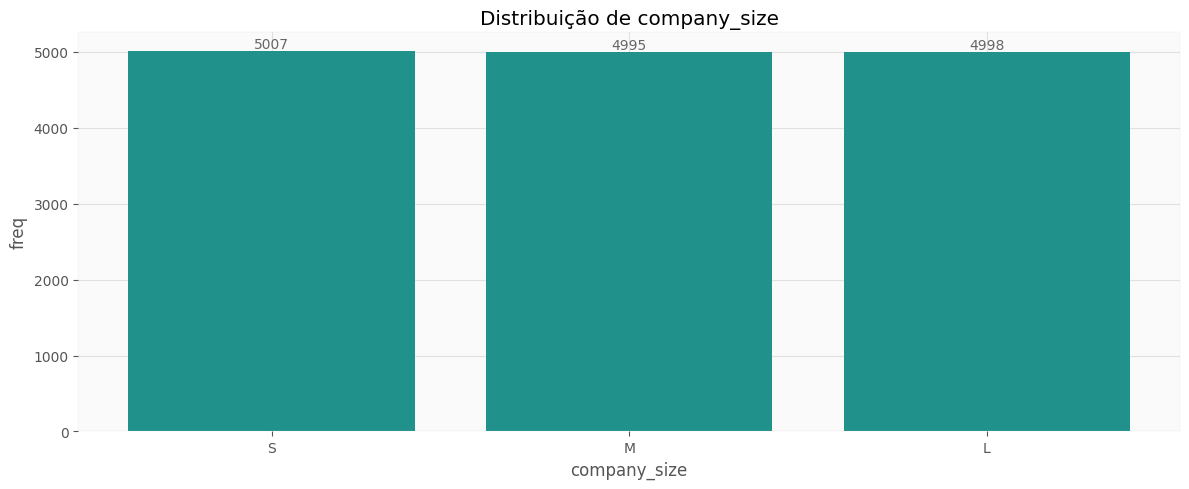

In [29]:
gera_grafico_barras_cnt(df, 'company_size', figsize=(12, 5), cor=cores_viridis[7])

Como podemos ver, a amostra está bem distribuída em termos das várias classes de *company_size*, não sendo observado desbalanceamento entre elas.

### employee_residence

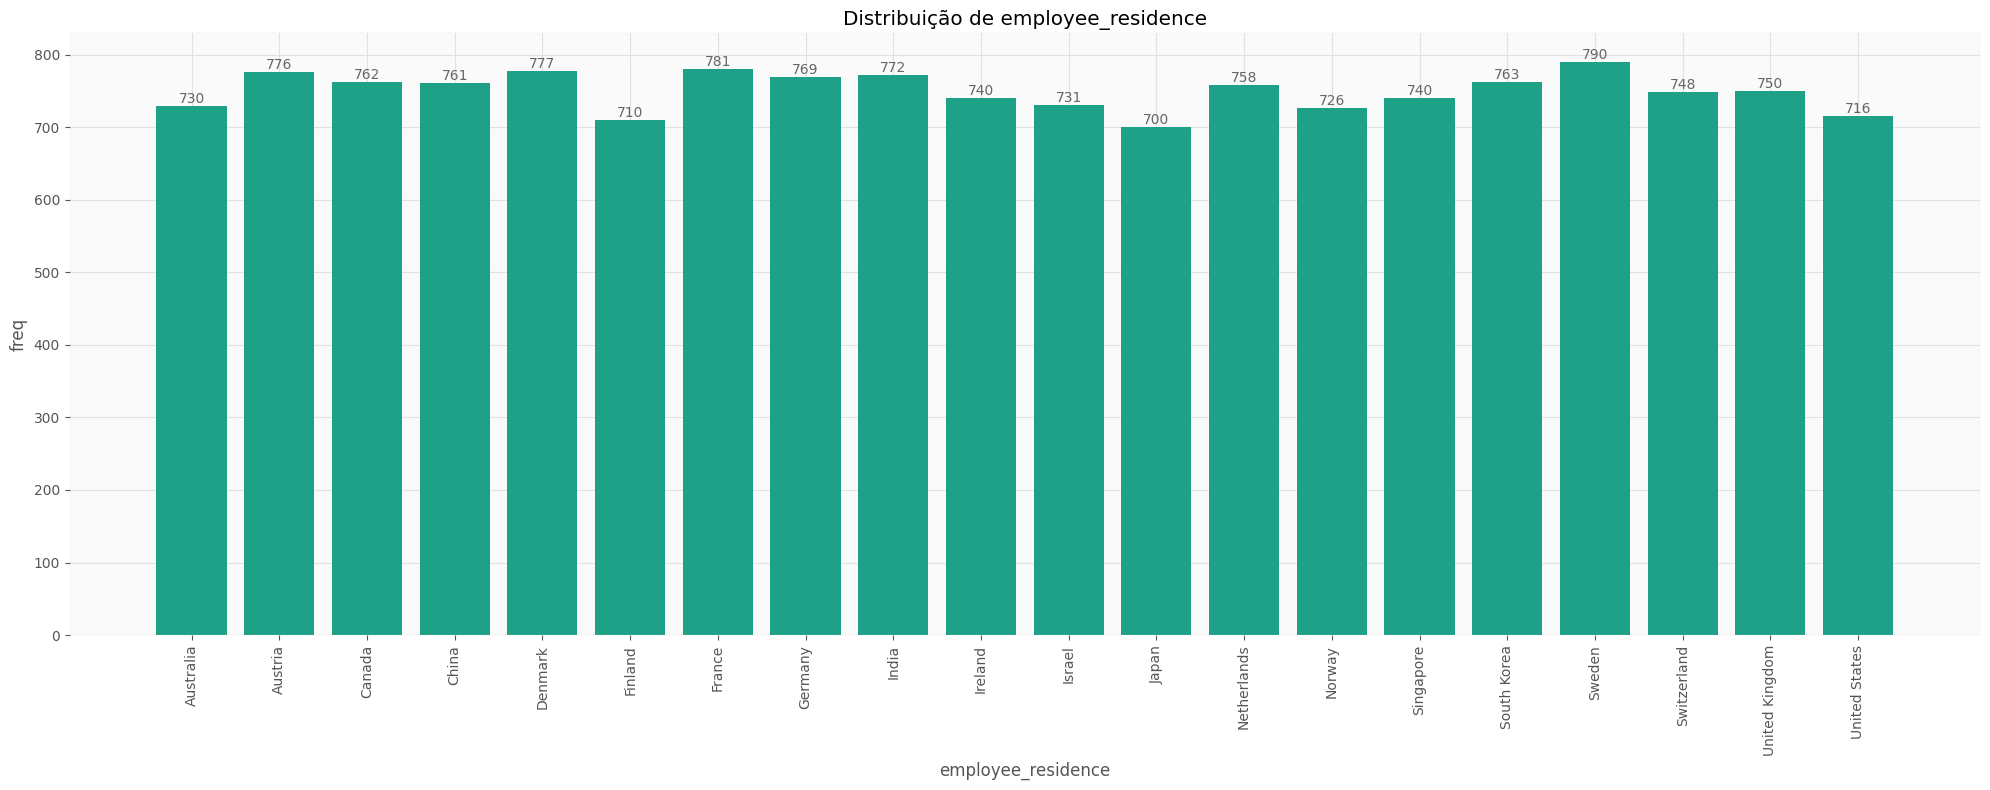

In [30]:
gera_grafico_barras_cnt(df, 'employee_residence', figsize=(20, 8), cor=cores_viridis[8], labels_x_vertical=True)

Como podemos ver, a amostra está bem distribuída em termos das várias classes de *employee_residence*. Há algumas classes que são um pouco mais frequentes que outras (como Sweden), mas não chega a haver grande desbalanceamento entre elas.

### remote_ratio

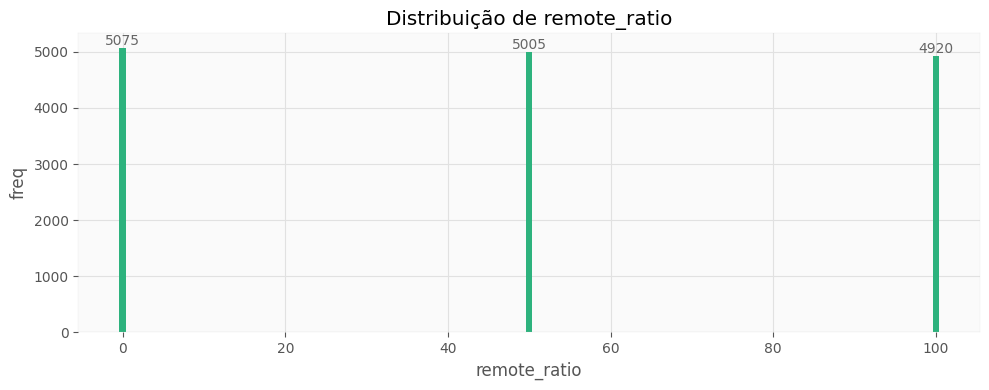

In [31]:
gera_grafico_barras_cnt(df, 'remote_ratio', figsize=(10, 4), cor=cores_viridis[9])

Como podemos ver, a amostra está bem distribuída em termos das várias classes de *remote_ratio*, não sendo observado desbalanceamento entre elas.

### required_skills

Essa variável é mais *tricky*, porque tem uma cardinalidade de valores muito alta, o que dificultaria ver um gráfico de barras. Precisaremos então adaptar a criação do gráfico de barras de forma mais específica.

In [32]:
top10_required_skills = df.groupby('required_skills', observed=True)['required_skills'].value_counts().sort_values(ascending=False).head(10)

top10_required_skills

,count
required_skills,
"Python, TensorFlow, PyTorch",17
"Python, TensorFlow, Tableau",9
"Python, TensorFlow, MLOps",7
"Python, TensorFlow, Linux",7
"Python, TensorFlow, Data Visualization",7
"Python, TensorFlow, Spark",6
"SQL, PyTorch, GCP",6
"Linux, Python, TensorFlow",6
"Python, TensorFlow, GCP",6


In [33]:
top10_required_skills.values

array([17,  9,  7,  7,  7,  6,  6,  6,  6,  6])

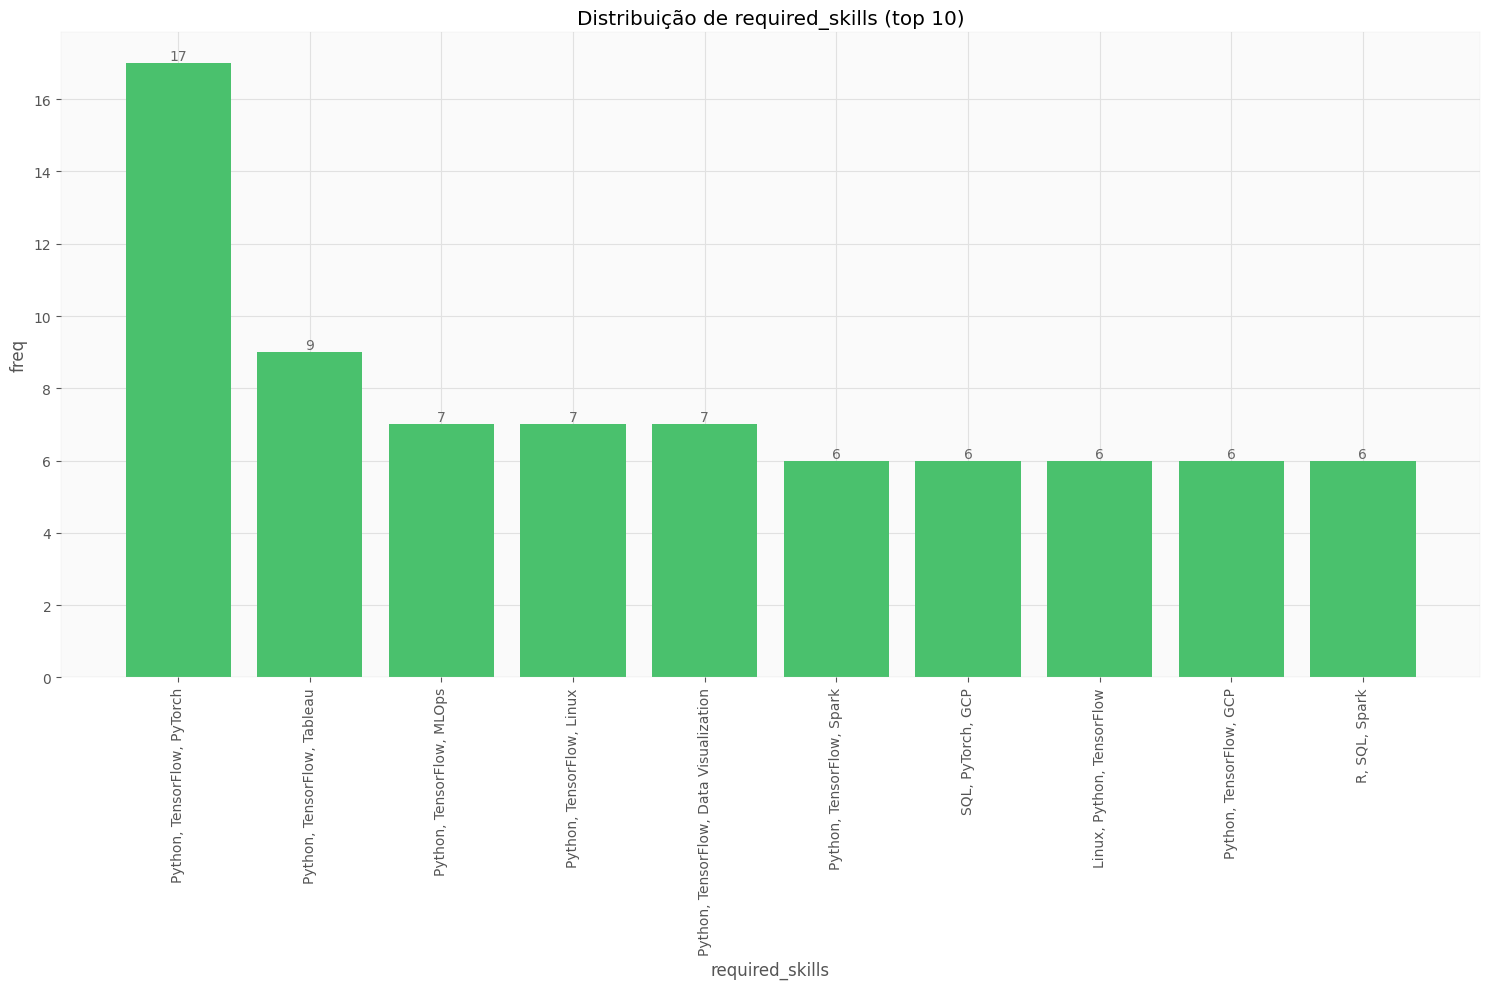

In [34]:
# config inicial da visualização
fig, ax = plt.subplots(figsize=(15, 10))

# constrói histograma (qtd de bins ajustada manualmente para melhor visualização)
ax.bar(
    x=top10_required_skills.index,
    height=top10_required_skills.values,
    color=cores_viridis[10])

# Exibe valores sobre cada barra
ax.bar_label(ax.containers[0], fmt="%.0f", color="#666666")

plt.xticks(rotation=90)

# definir título
plt.title(f"Distribuição de required_skills (top 10)")

# definir rótulos dos eixos
plt.xlabel(f"required_skills")
plt.ylabel("freq")

# eliminar margens desnecessárias
plt.tight_layout()

# exibir o gráfico
plt.show()

Este caso é interessante: claramente temos um desbalanceamento entre as várias classes de *required_skills*, além de uma cardinalidade alta de classes. Mas, conforme visto na seção de hipóteses, podemos supor que esse desbalanceamento de fato é o que é observado no mundo real e que algumas skills são mais solicitadas que outras (e consequentemente provavelmente pagam mais também). Assim não será feita nenhuma ação específica para resolver este desbalanceamento.

### education_required

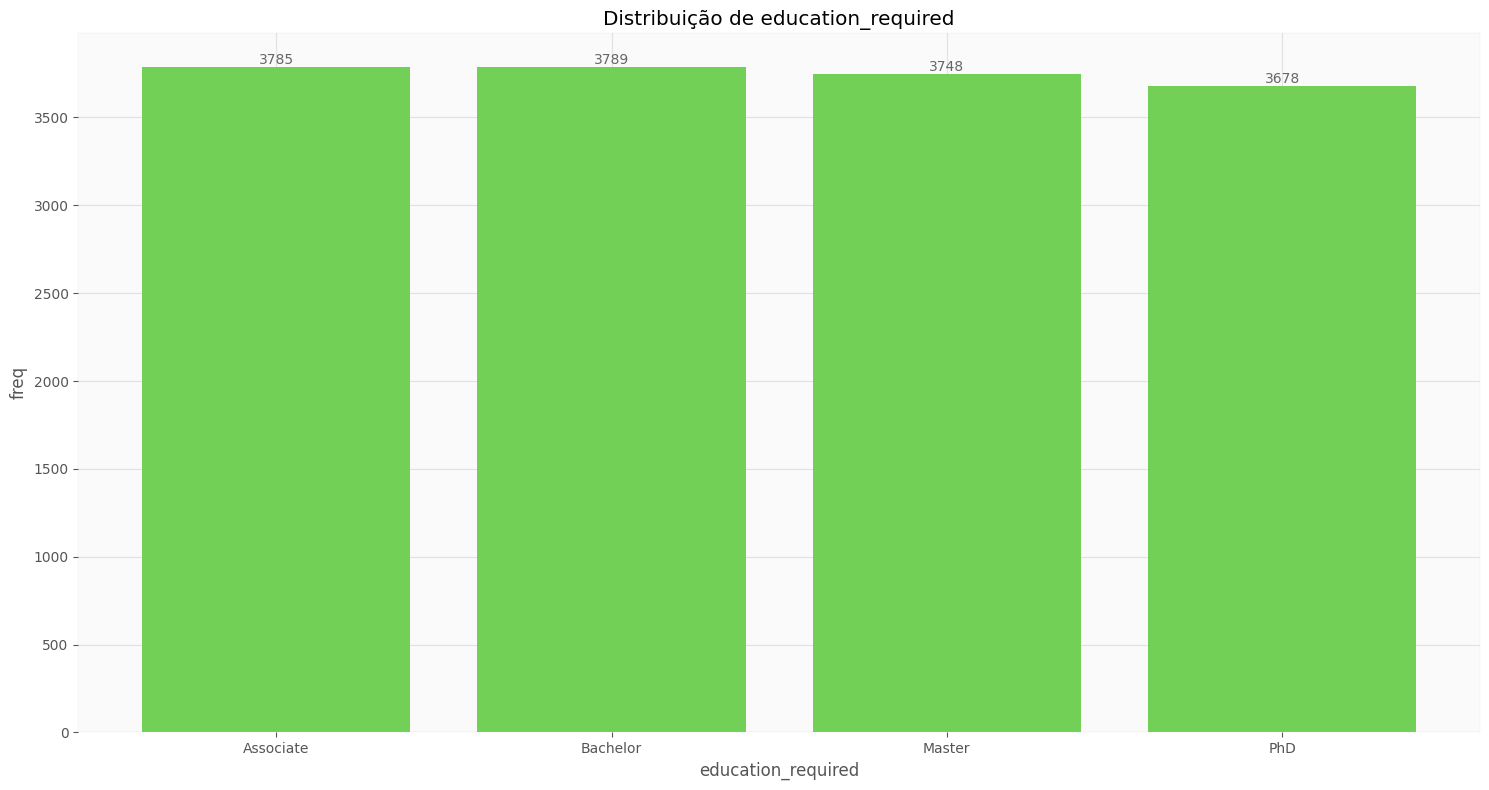

In [35]:
gera_grafico_barras_cnt(df, 'education_required', figsize=(15, 8), cor=cores_viridis[11])

Como podemos ver, a amostra está bem distribuída em termos das várias classes de *education_required*, não sendo observado desbalanceamento entre elas.

### industry

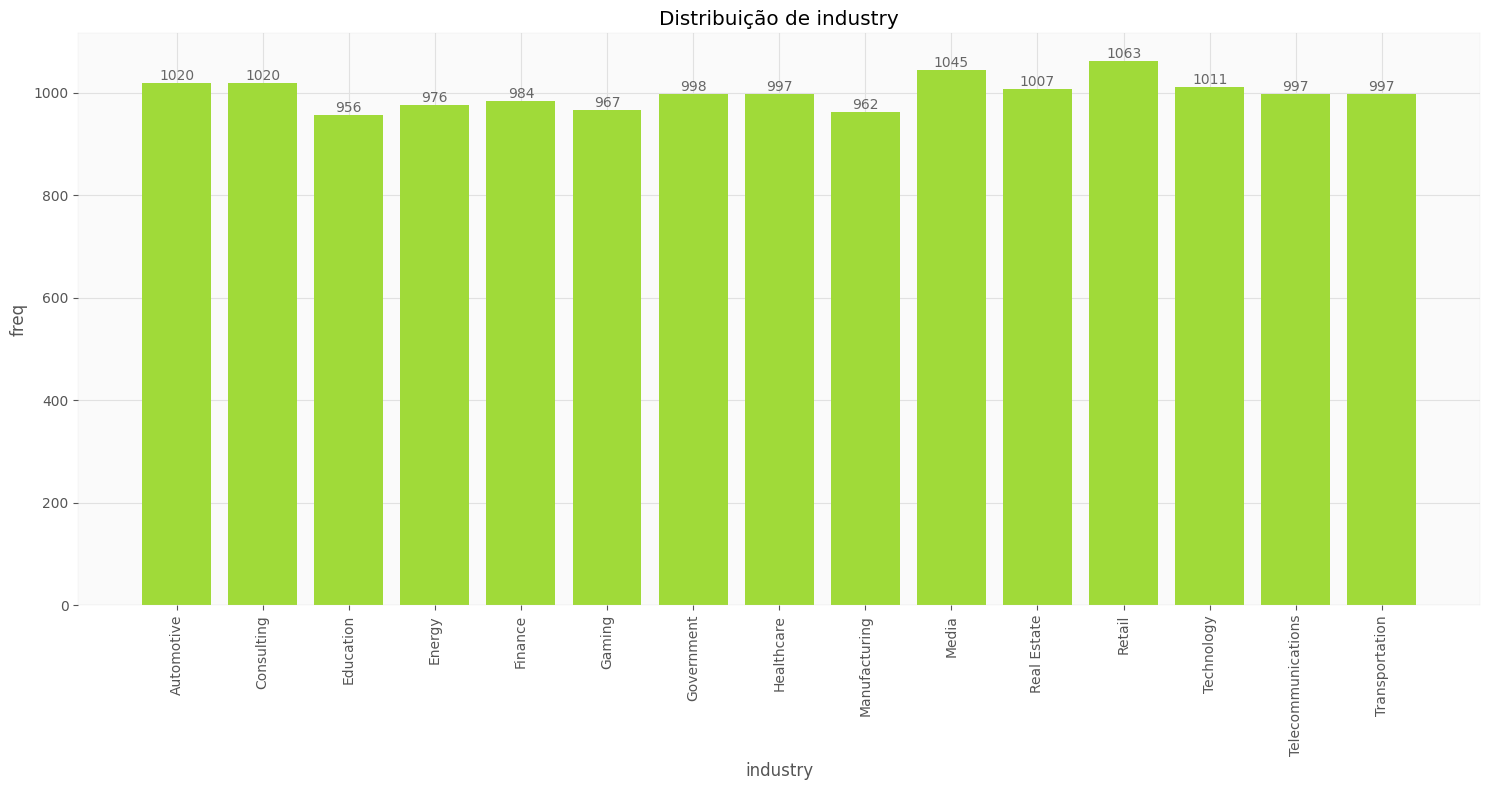

In [36]:
gera_grafico_barras_cnt(df, 'industry', figsize=(15, 8), cor=cores_viridis[12], labels_x_vertical=True)

Como podemos ver, a amostra está bem distribuída em termos das várias classes de *industry*. Há algumas classes que são um pouco mais frequentes que outras (como Retail), mas não chega a haver grande desbalanceamento entre elas.

### salary_currency

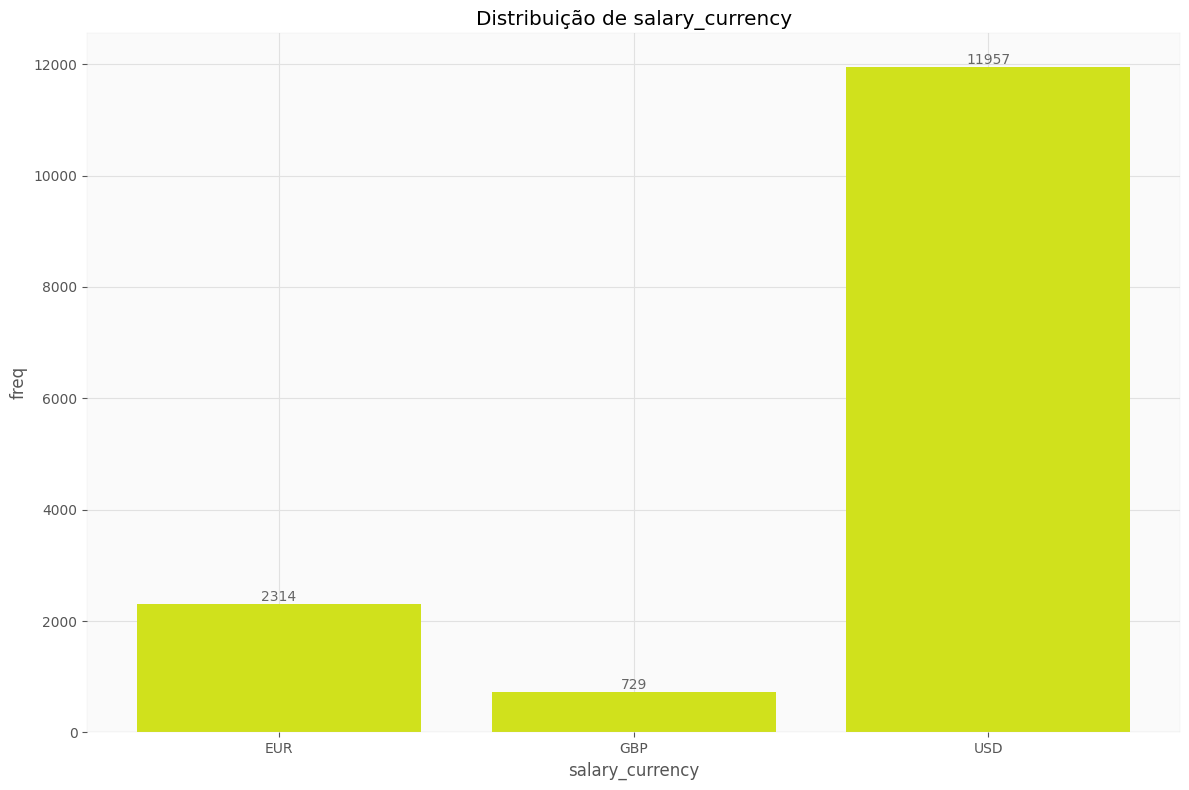

In [37]:
gera_grafico_barras_cnt(df, 'salary_currency', figsize=(12, 8), cor=cores_viridis[13])

Outro caso interessante: claramente temos um desbalanceamento entre as várias classes de *salary_currency*. Porém, conforme visto na seção de hipóteses, também podemos supor que esse desbalanceamento de fato é o que é observado no mundo real e que a maioria das vagas no mundo real é paga em USD mesmo. Assim, não vamos tomar nenhuma medida específica para resolver este desbalanceamento.

## Análises multivariadas e avaliação de hipóteses

De início, vamos buscar observar como varia o salário com algumas das variáveis categóricas, como os valores estão concentrados em faixas mais altas ou mais baixas para cada classe. Para tal, vamos construir para cada variável categórica boxplots para cada uma de suas classes.

In [38]:
def gera_grafico_boxplot_categorica(df, coluna, target, figsize=(10, 6), cor="#2E4057"):
  bplots = sns.catplot(data=df,
    x=coluna, y=target,
    kind='box',
    height=figsize[0],
    aspect=(figsize[0]/figsize[1]),
    sharex=False,
    sharey=True,
    color=cor
  )


  # definir rótulos dos eixos
  bplots.set_axis_labels(coluna, target)

  # definir título
  plt.suptitle(f'Distribuição de {target} por classe de {coluna}')

  # eliminar margens desnecessárias
  plt.tight_layout()

  # exibir o gráfico
  plt.show()

### Vagas vs senioridade

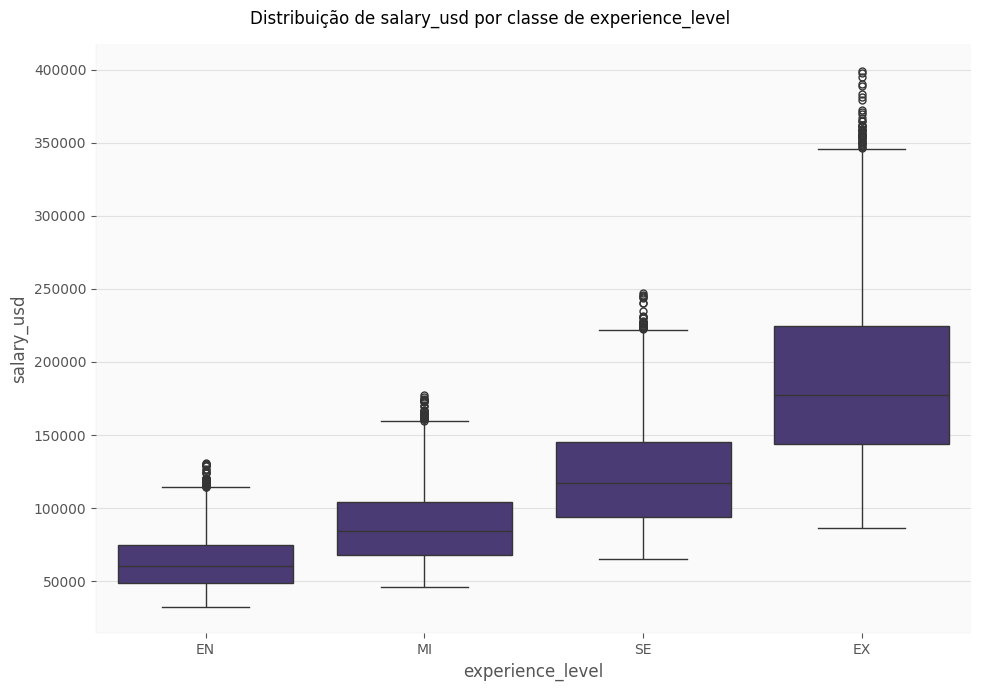

In [39]:
gera_grafico_boxplot_categorica(df, coluna='experience_level', target='salary_usd', figsize=(7, 5), cor=cores_viridis[2])

Confirmando nossas hipótese, podemos ver que de fato, vagas com nível de experiência mais inicial pagam em geral menos que vagas com maior senioridade/nivel de experiência mais alto. Também podemos ver que, de todas as vagas, as executivas pagam os maiores salários, conforme também esperado.

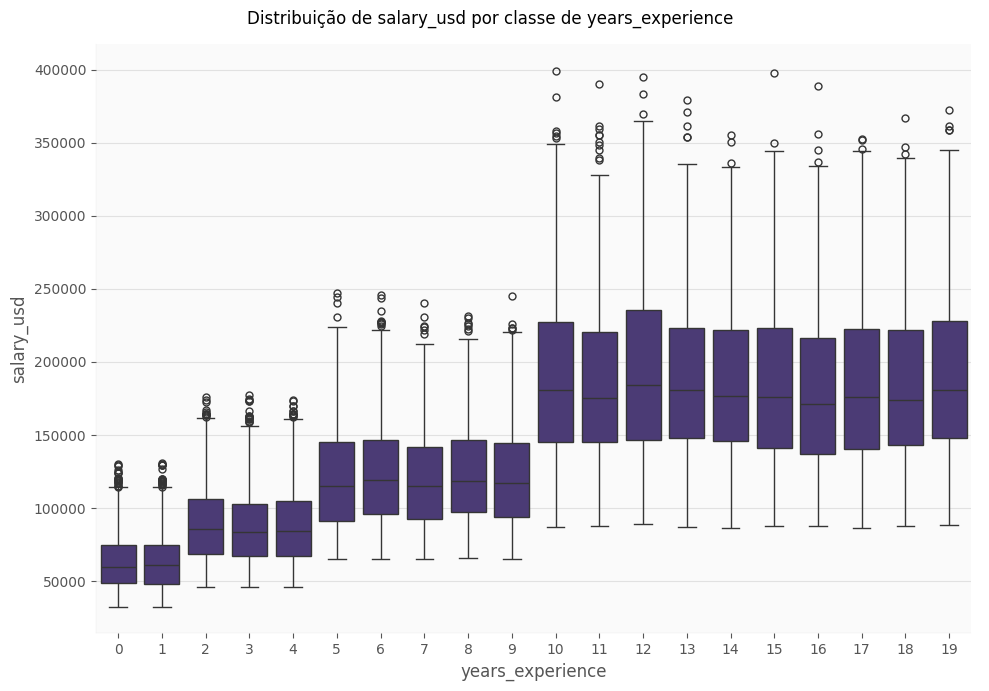

In [40]:
gera_grafico_boxplot_categorica(df, coluna='years_experience', target='salary_usd', figsize=(7, 5), cor=cores_viridis[2])

Conforme esperado também, os salários são maiores conforme avançam os anos de experiência da pessoa. Entretanto, interessantemente parece que há faixas de anos de experiência nas quais não variam muitos os valores dentro das faixas - 0-1 ano, 2-4 anos, 5-9 anos, 10-19 anos.

### Vagas vs tipo da vaga (full time, part time, etc)

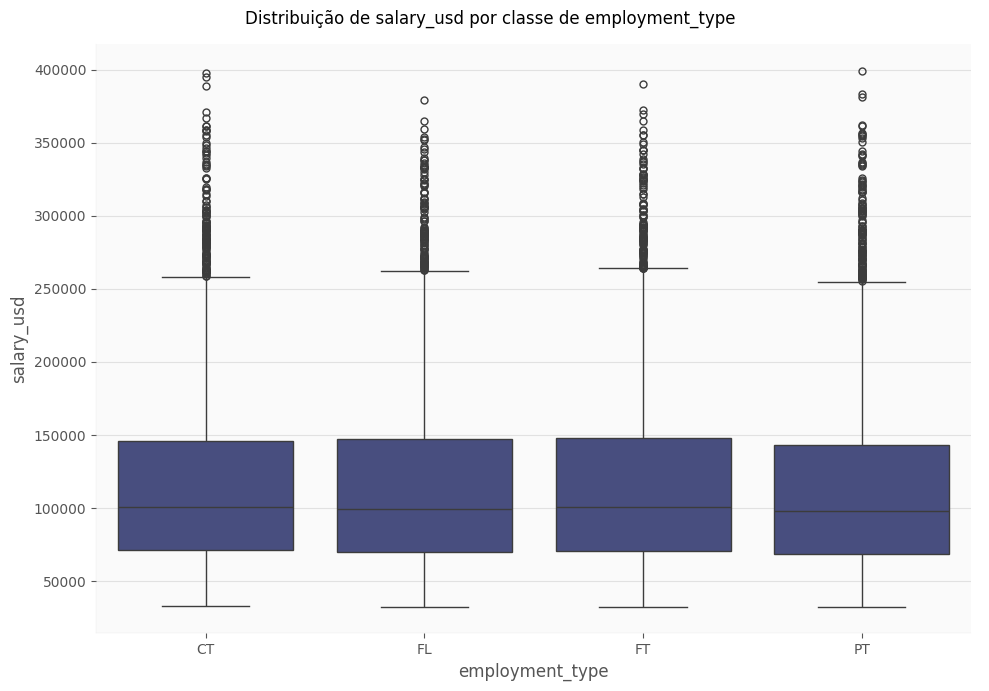

In [41]:
gera_grafico_boxplot_categorica(df, coluna='employment_type', target='salary_usd', figsize=(7, 5), cor=cores_viridis[3])

Interessantemente, ao contrário do que achávamos, as vagas não parecem ser influenciadas pelo tipo de contrato, seja full time, part time, freelance, etc, todos parecem seguir a mesma distribuição e pagar aproximadamente os mesmos salários.

### Vagas vs local da vaga/empresa

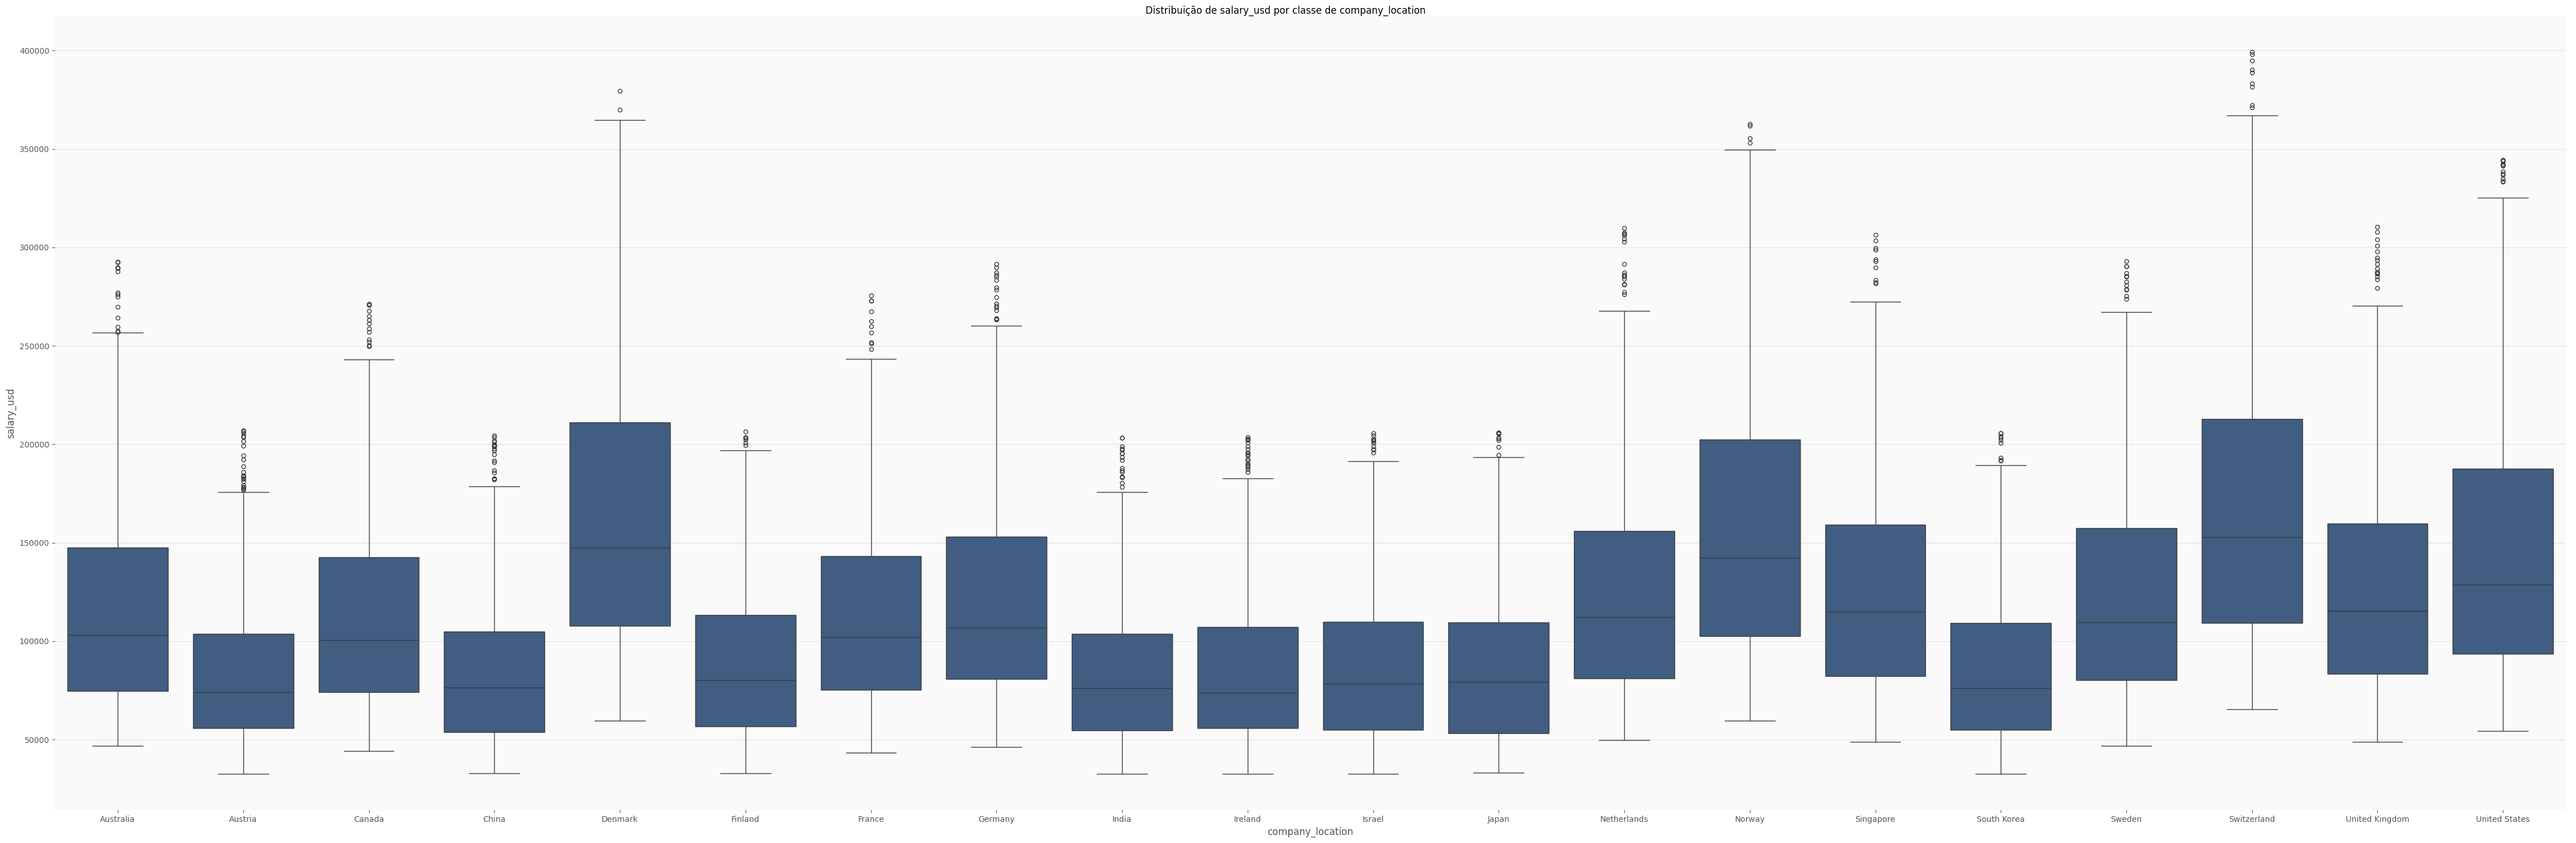

In [42]:
gera_grafico_boxplot_categorica(df, coluna='company_location', target='salary_usd', figsize=(15, 5), cor=cores_viridis[4])

Conforme esperávamos, há de fato vários países que pagam bem mais que outros: os EUA, mas também Dinamarca, Noruega e Suíça.
Na sequência, há alguns países que ainda pagam bem mas de forma intermediária, como Austrália, Canadá, Alemanha, Holanda, Singapura, Suécia e Reino Unido.
Por fim, há países que pagam bem menos que outros, como Áustria, China, Finlândia, Índia, Irlanda, Israel, Japão e Coreia do Sul.
Não há dados de continentes como América Central, do Sul e África, não sendo possível confirmar a hipótese de que ofertam salários menores.

### Vagas por local da vaga vs local do funcionário

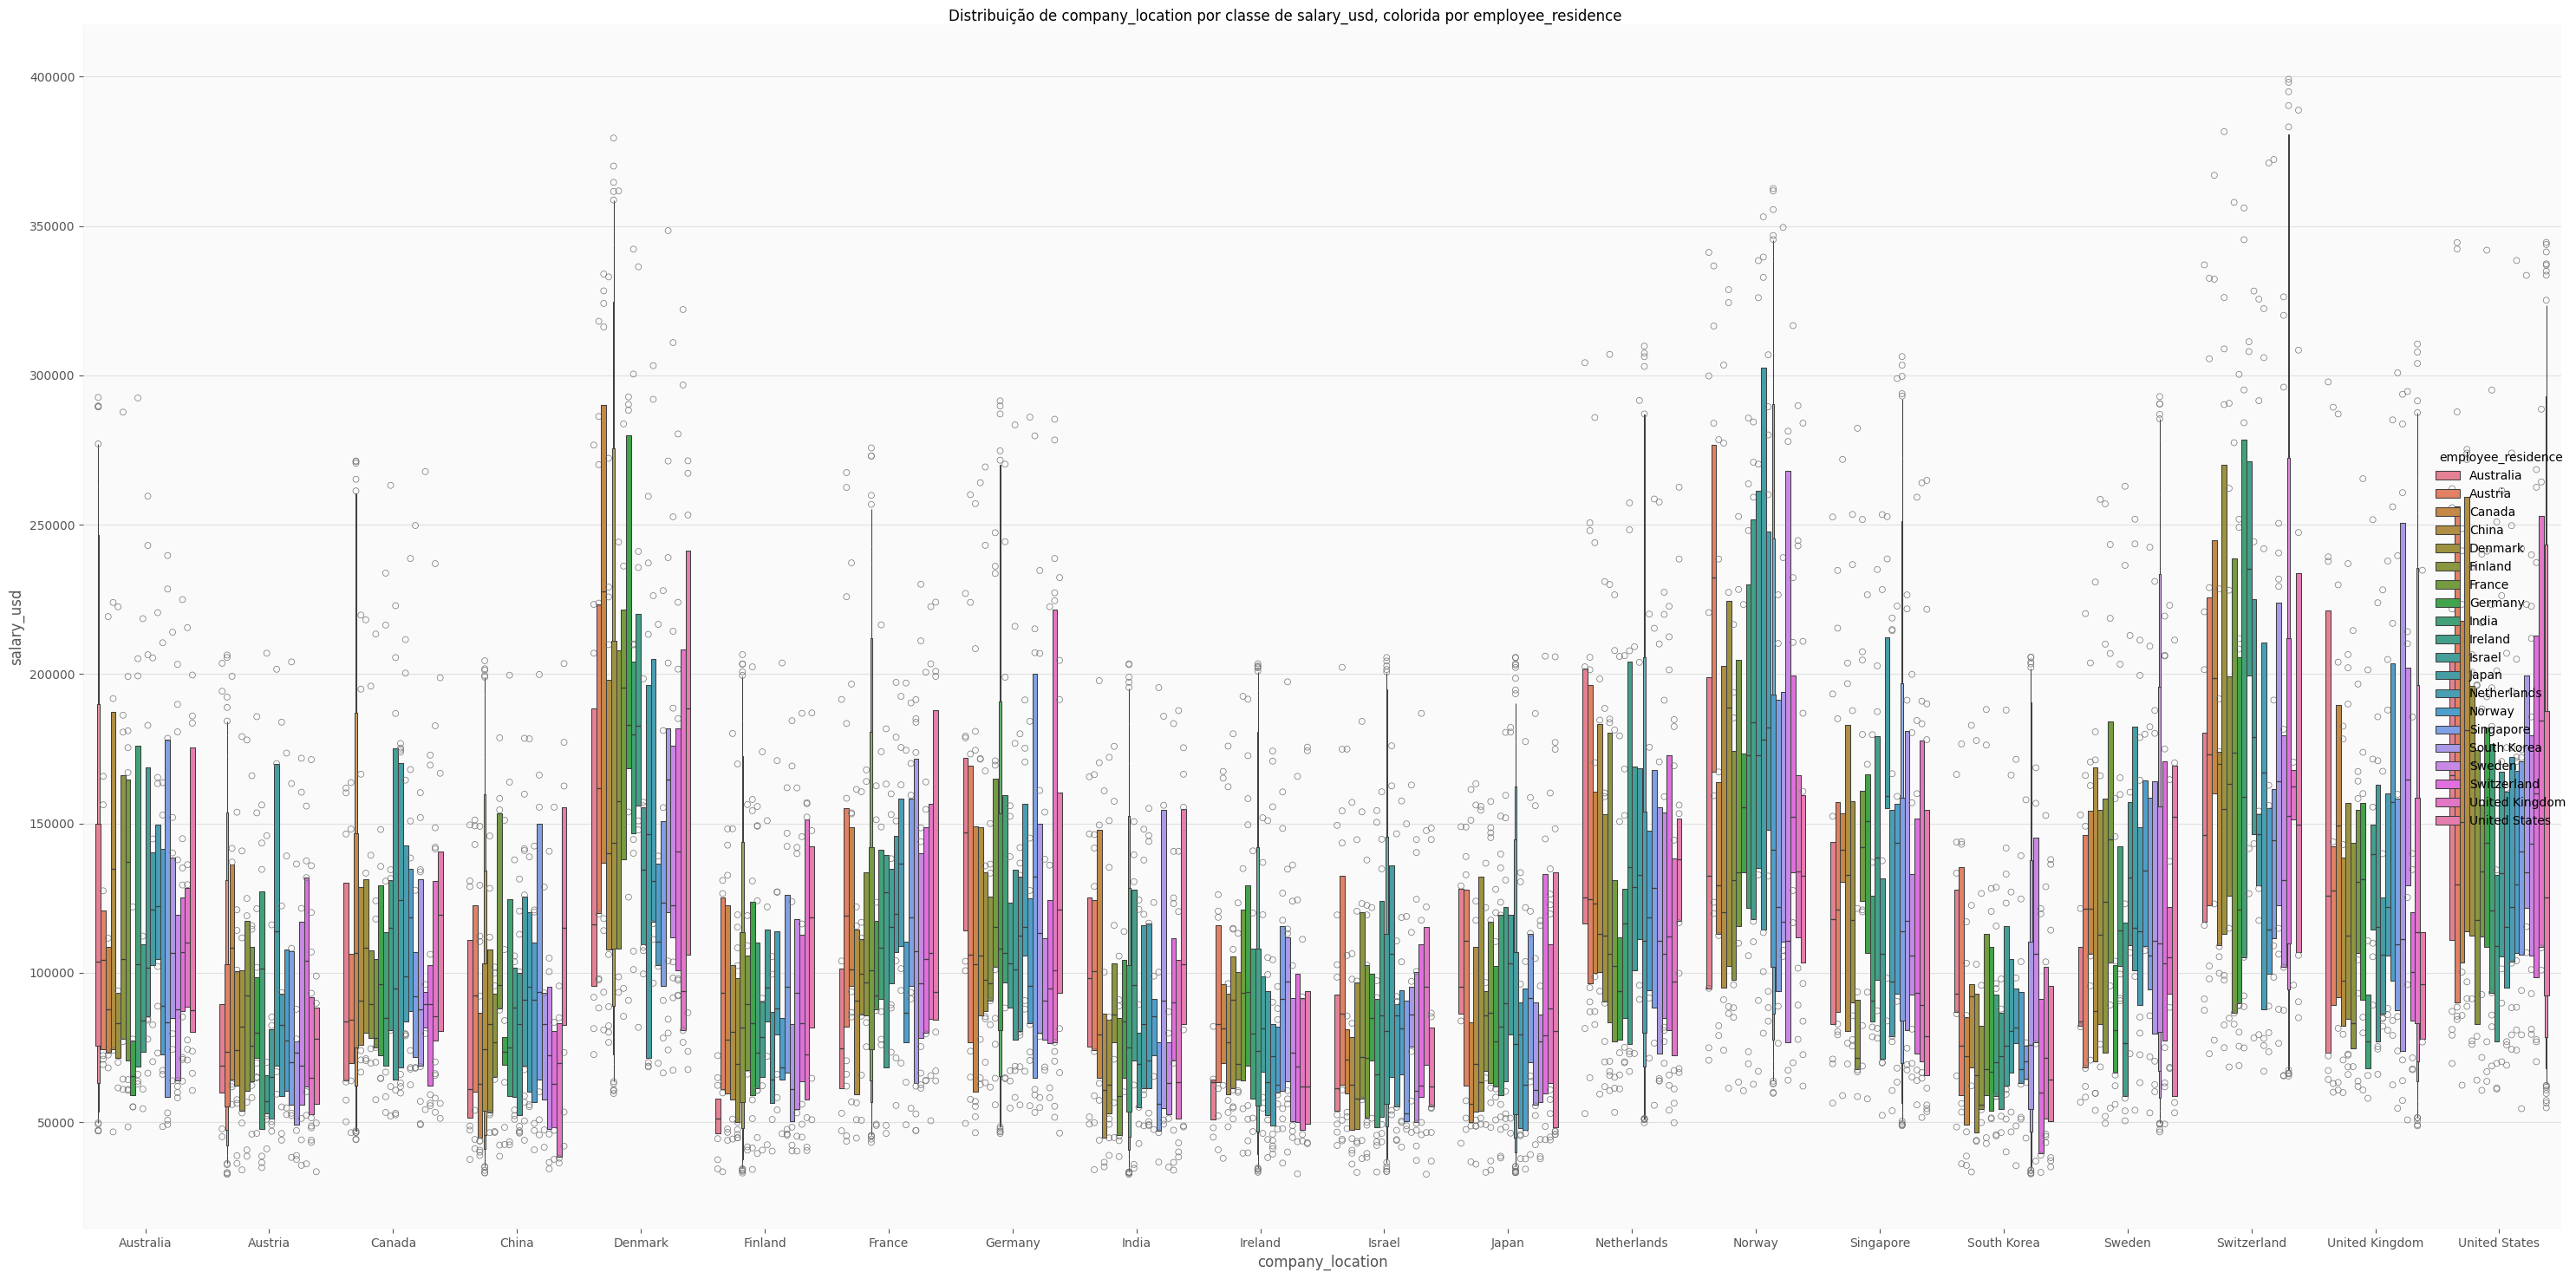

In [43]:
bplots = sns.catplot(data=df,
    x='company_location', y='salary_usd', hue='employee_residence',
    kind='boxen',
    height=15,
    aspect=(15/8),
    sharex=False,
    sharey=True
  )


# definir rótulos dos eixos
bplots.set_axis_labels('company_location', 'salary_usd')

# definir título
plt.suptitle(f'Distribuição de company_location por classe de salary_usd, colorida por employee_residence')

# eliminar margens desnecessárias
plt.tight_layout()

# exibir o gráfico
plt.show()

Conforme esperado, de fato o salário é influenciado pelo local de residência do funcionário. E ao contrário do que achávamos, não é como se pagassem sempre mais apenas para os americanos (para competir com seu mercado interno) e menos para os demais: na realidade, pelo gráfico acima vemos que pagam em geral mais para o cidadão local do que para o estrangeiro. E mesmo entre estrangeiros, há variabilidade nos pagamentos, mas no geral pagam mais para determinados países: EUA, Singapura, Reino Unido, Suíça.

### Vagas vs moeda local

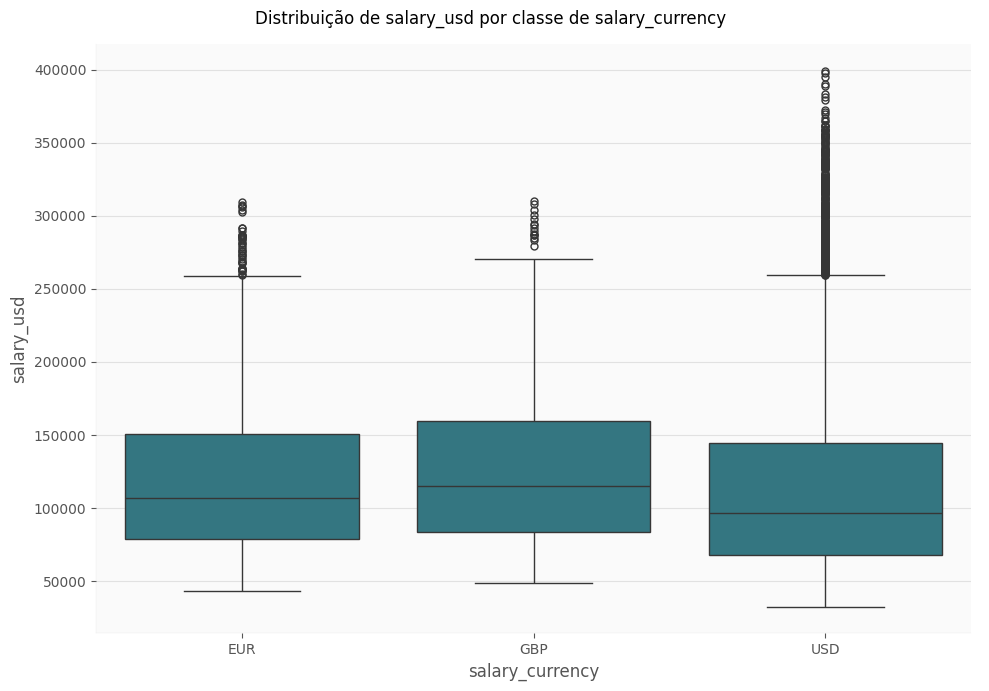

In [44]:
gera_grafico_boxplot_categorica(df, coluna='salary_currency', target='salary_usd', figsize=(7, 5), cor=cores_viridis[6])

Ao contrário do que achávamos, desconsiderados outliers do mercado americano, paga-se mais ou menos a mesma coisa (normalizado para USD anuais, claro) nos países independente da força da moeda local. A análise fica um pouco prejudicada porque todas as moedas de pagamento são de fato fortes (EUR, GBP, USD), não tendo possível observar se isso permanece válido para pagamentos em moedas da América Central ou do Sul ou da África (como vimos, não há no dataset vagas desses continentes).

### Vagas vs tipo de vaga (remota, presencial, híbrida)

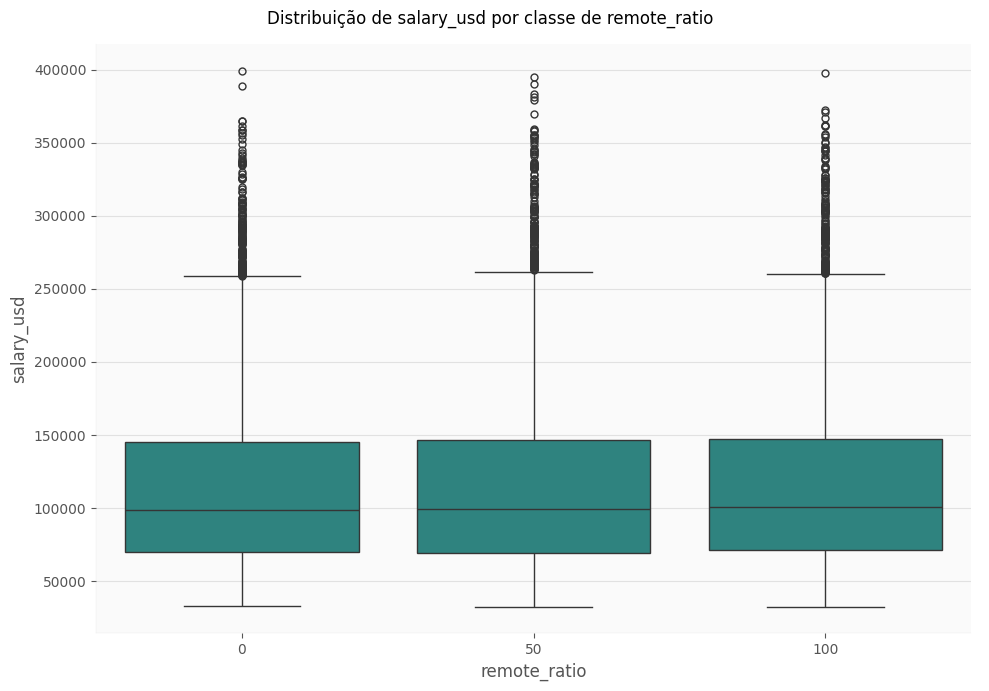

In [45]:
gera_grafico_boxplot_categorica(df, coluna='remote_ratio', target='salary_usd', figsize=(7, 5), cor=cores_viridis[7])

Conforme imaginávamos, não há distinção entre nível de pagamento pelo tipo da vaga, se remota, presencial ou híbrida, todas pagam mais ou menos os mesmos valores.

### Vagas vs tamanho da empresa e setor

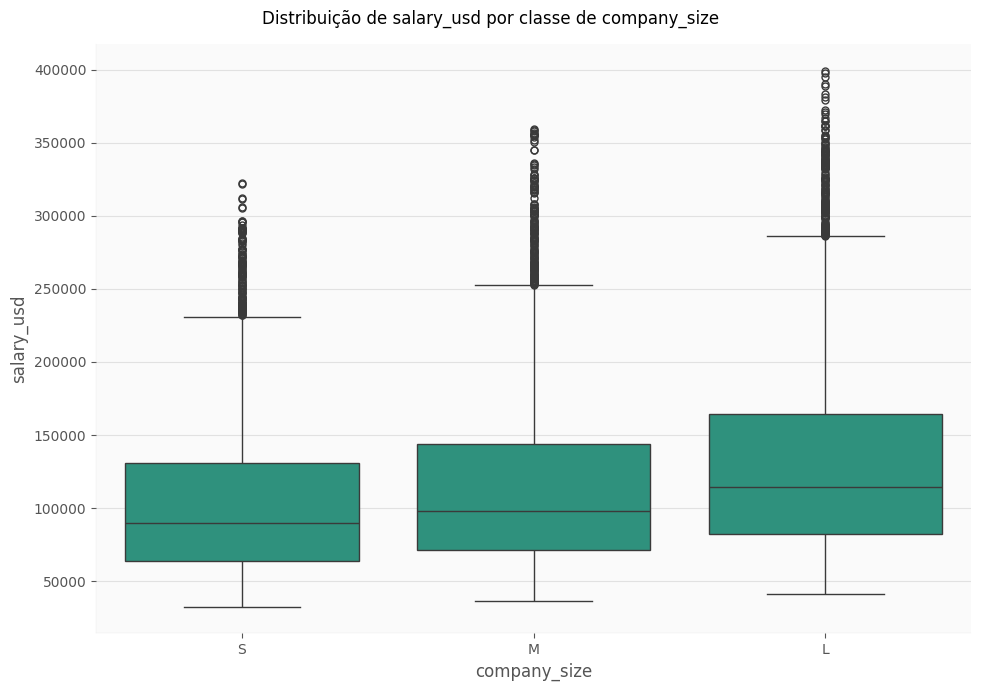

In [46]:
gera_grafico_boxplot_categorica(df, coluna='company_size', target='salary_usd', figsize=(7, 5), cor=cores_viridis[8])

Conforme esperado, empresas maiores pagam salários em geral maiores.

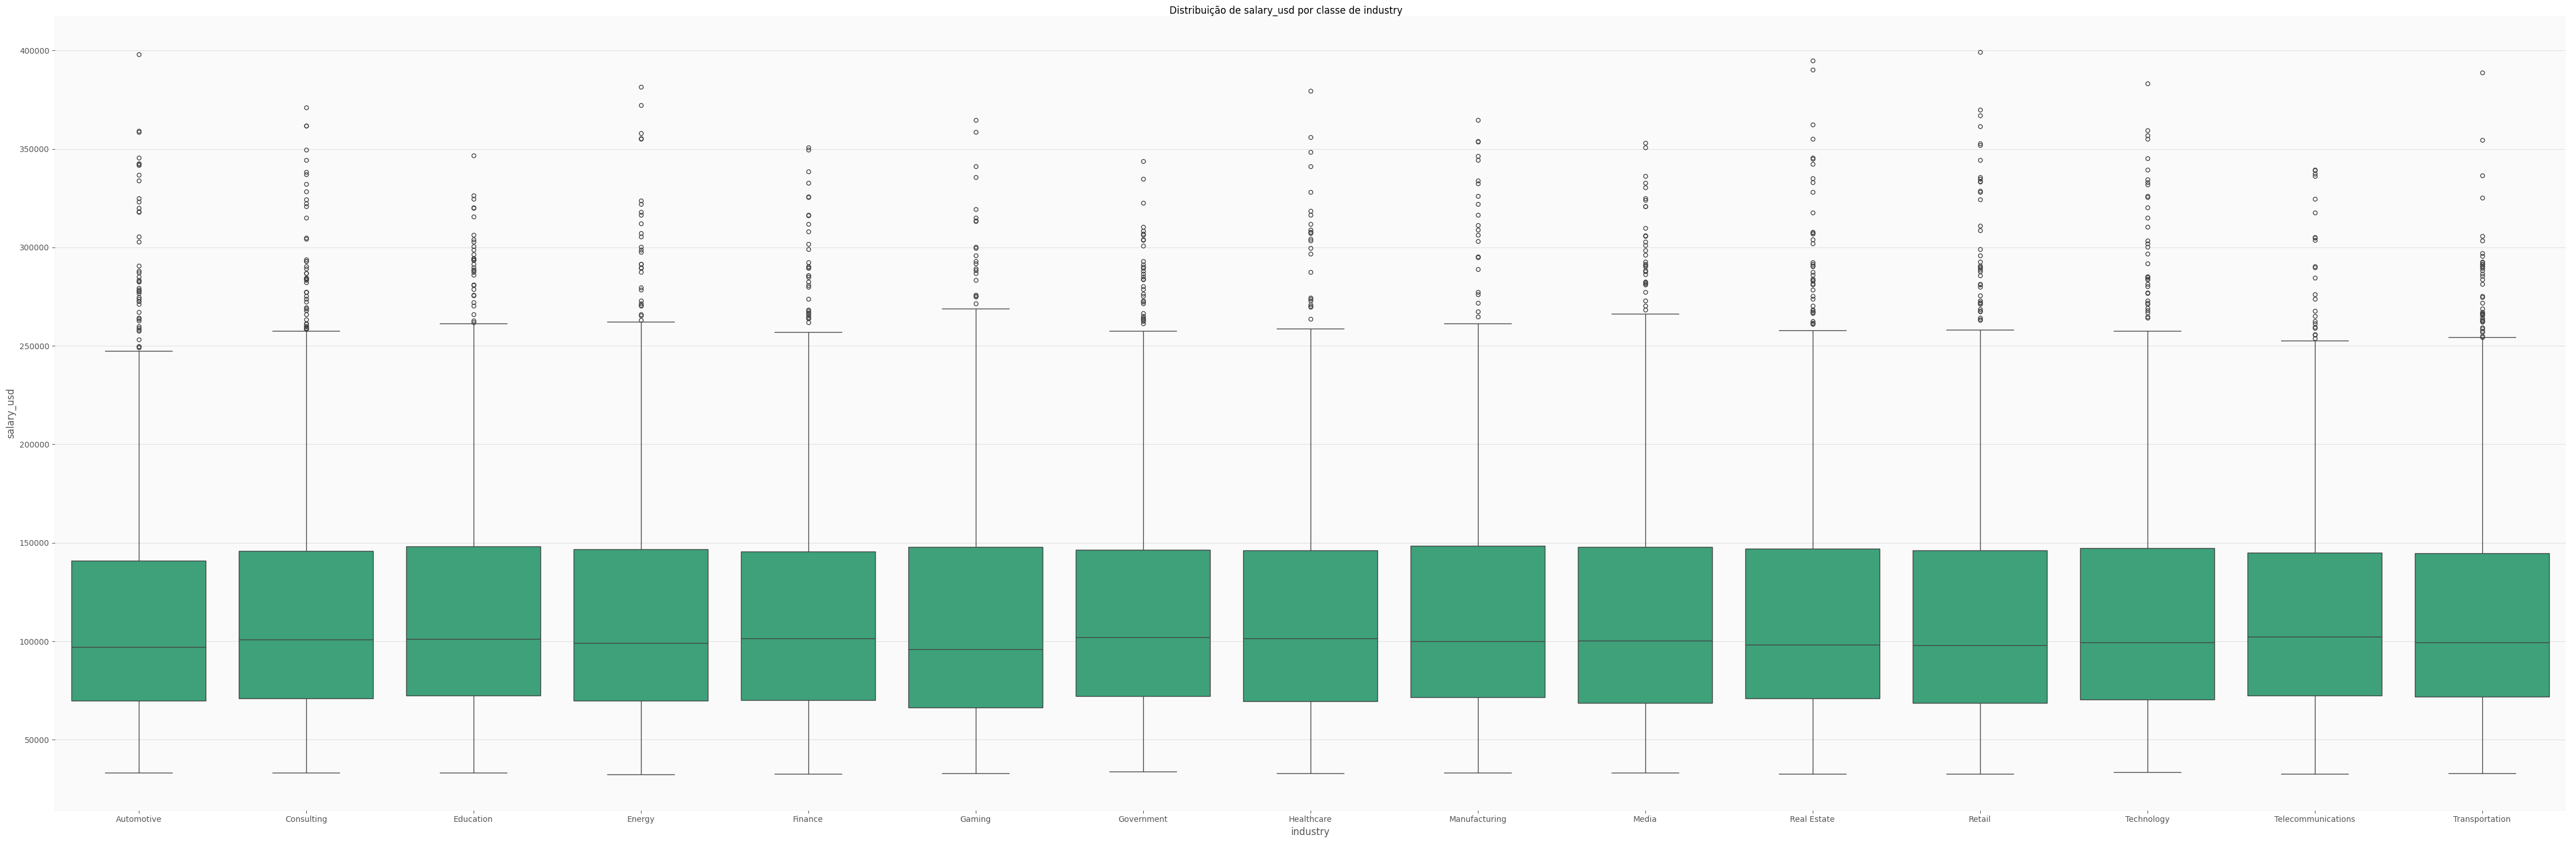

In [47]:
gera_grafico_boxplot_categorica(df, coluna='industry', target='salary_usd', figsize=(15, 5), cor=cores_viridis[9])

Contrario sensu, não há variações relevantes no nível do pagamento de acordo com o setor da empresa, todos os setores pagam de maneira muito similar.

### Vagas vs nível de educação requerida

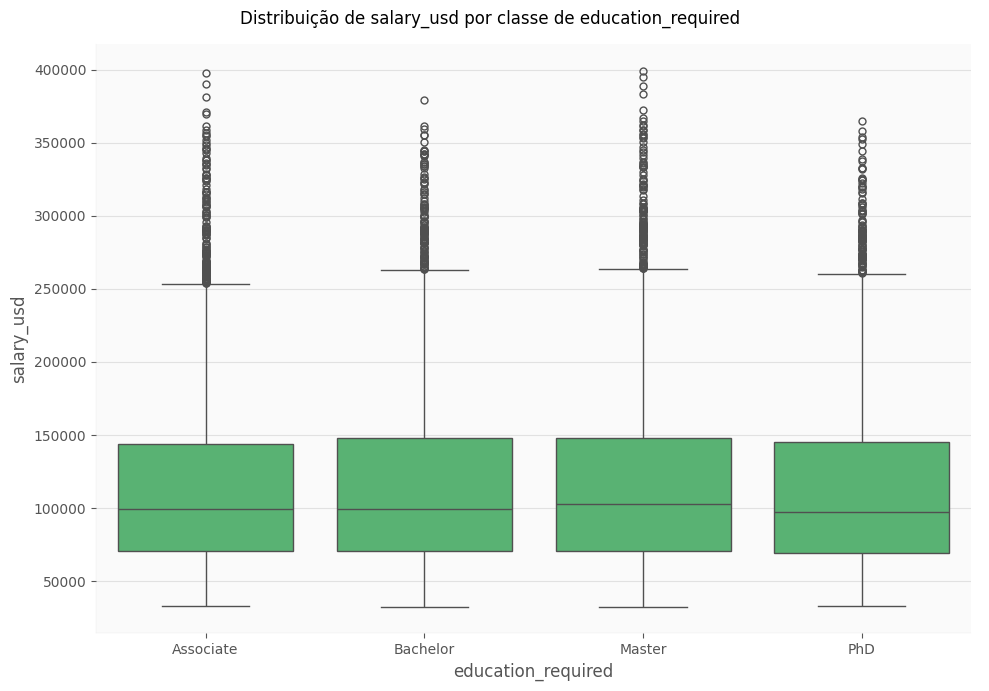

In [48]:
gera_grafico_boxplot_categorica(df, coluna='education_required', target='salary_usd', figsize=(7, 5), cor=cores_viridis[10])

Como nas vagas gerais de TI, para área de dados o mercado não faz grandes distinções de salário em função do nível de educação requerida, pagam mais ou menos de forma igual para todos os níveis

### Vagas vs sofisticação da descrição da vaga

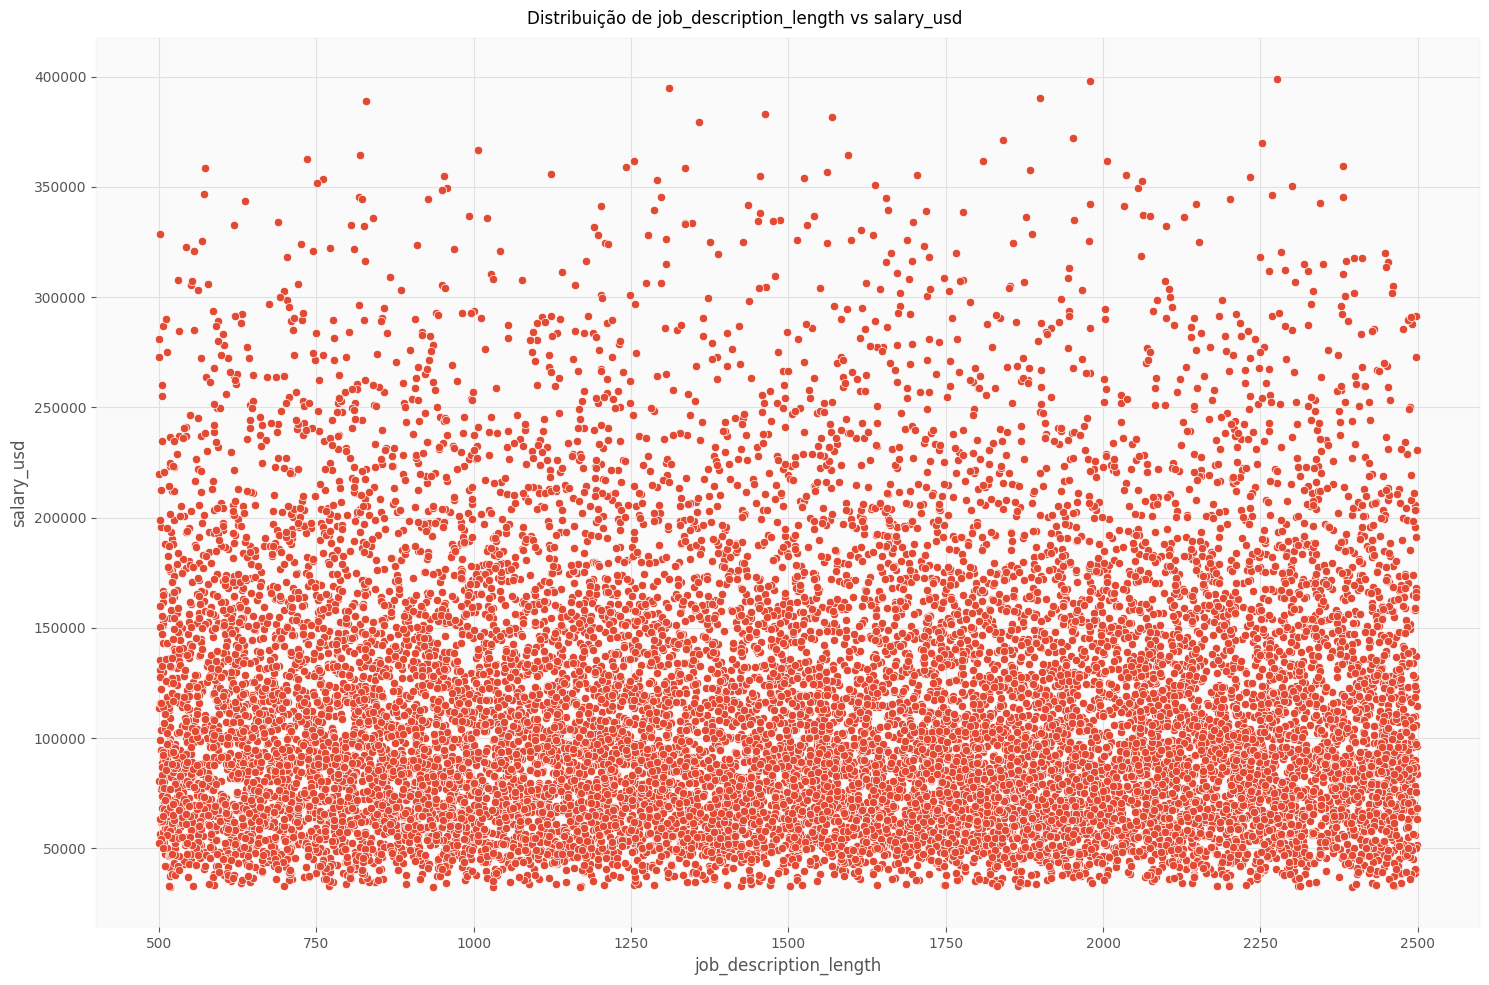

In [49]:
# config inicial da visualização
fig, ax = plt.subplots(figsize=(15, 10))

scplot = sns.scatterplot(data=df,
    x='job_description_length', y='salary_usd'
)


# definir rótulos dos eixos
plt.xlabel('job_description_length')
plt.ylabel('salary_usd')

# definir título
plt.suptitle(f'Distribuição de job_description_length vs salary_usd')

# eliminar margens desnecessárias
plt.tight_layout()

# exibir o gráfico
plt.show()

Conforme havíamos suposto, não parece haver qq correlação entre o nível de sofisticação (detalhamento, tamanho) da descrição da vaga e o salário oferecido.

### Vagas vs nível de benefícios oferecido

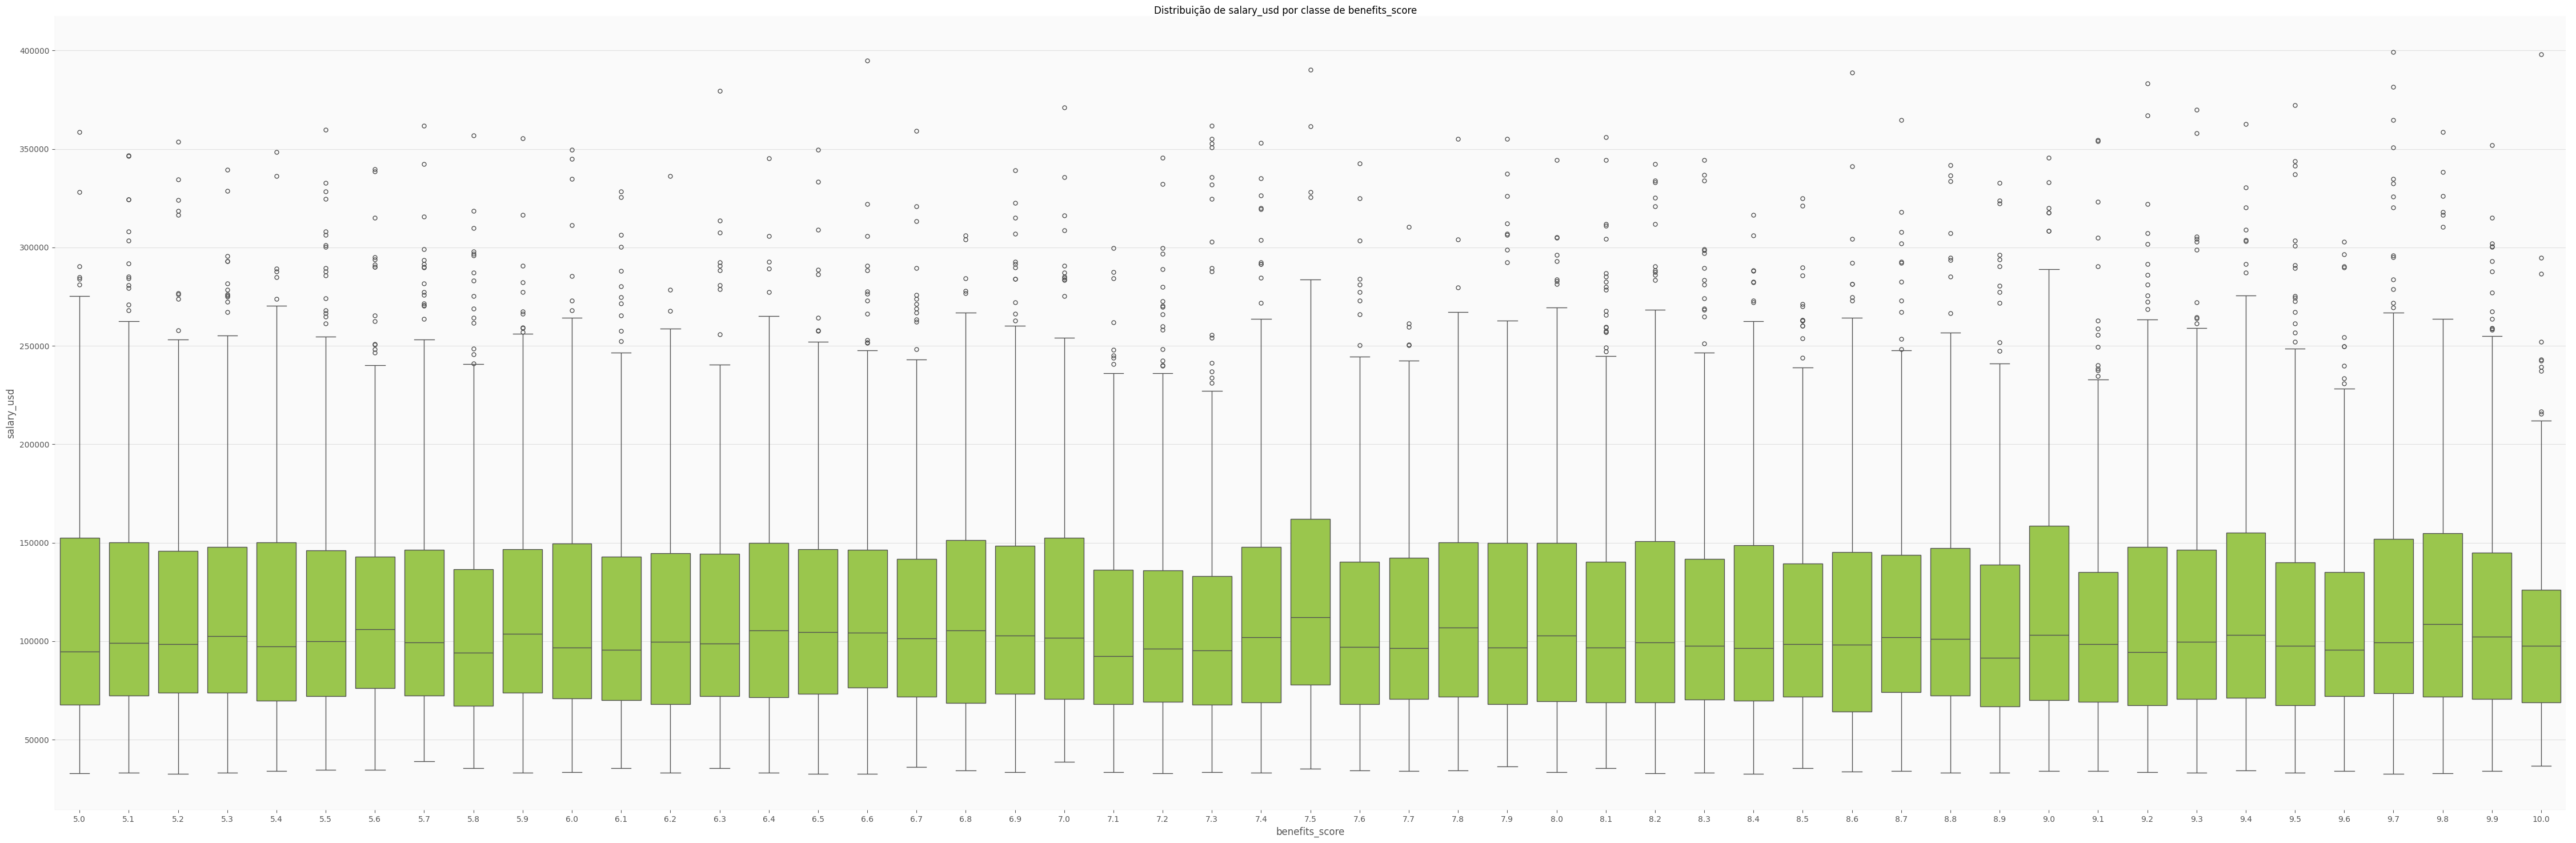

In [50]:
gera_grafico_boxplot_categorica(df, coluna='benefits_score', target='salary_usd', figsize=(15, 5), cor=cores_viridis[12])

Como podemos ver, não há relação direta entre os benefícios oferecidos e o nível salarial da vaga, há salários maiores e menores em todos os níveis de benefícios.

### Correlação entre variáveis numéricas

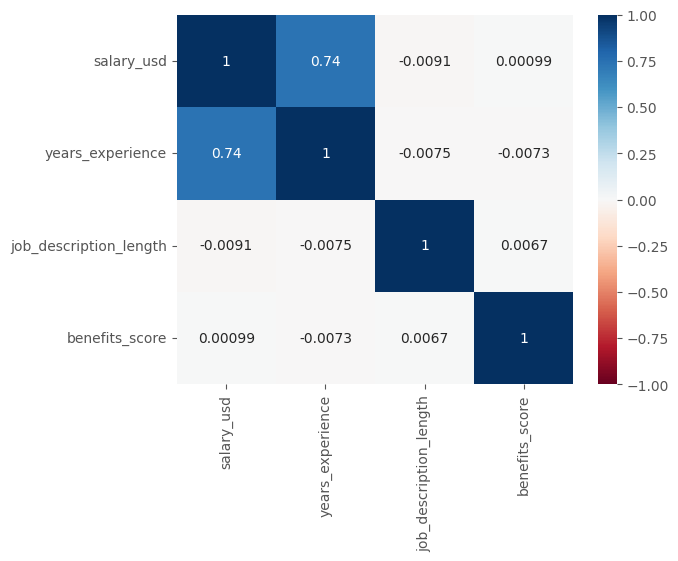

In [51]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Conforme havíamos antecipado, apenas *years_experience* tem correlação positiva e forte com *salary_usd*. As demais variáveis, *job_description_length* e *benefits_score* basicamente não influenciam o nível de salário pago.

# Pré-processamento dos dados

Após conhecermos melhor os dados, analisarmos como costumam variar, que valores aparecem em cada variável, etc, podemos preparar a amostra para uso futuro no modelo de ML, com vistas a resolver o problema proposto (regressão supervisionada do *salary_usd*)

Primeiramente, podemos descartar variáveis que não influenciam o salário, que seriam pouco úteis para a regressão.

Na sequência, as operações que realizaremos estão boa parte relacionadas a conversão de variáveis categóricas em numéricas (*encoding*) e a normalização/padronização de variáveis numéricas, conforme seja necessário.

Após realizar as operações acima, iremos separar a amostra em amostras para treino e validação, utilizando k-fold cross-validation.

## Eliminando variáveis pouco úteis para modelo

In [52]:
df = df.drop(
    columns=['job_id', # apenas identificador do job, não é útil
             'job_title',  # apenas título do job, não é útil
             'company_name', # não faremos análise em cima do nome da empresa
             'required_skills', # não faremos análise em cima das skills
             'posting_date', 'application_deadline', # não faremos análise com time series
             # não influenciam o salário
             'job_description_length', 'benefits_score',
             # não há grande variação entre as classes de suas categorias, não influenciam o salário também
             'salary_currency',
             'education_required', 'industry', 'remote_ratio', 'employment_type'])

In [53]:
# printar para vermos as variáveis que sobraram
df.head()

,salary_usd,experience_level,company_location,company_size,employee_residence,years_experience
0,90376,SE,China,M,China,9
1,61895,EN,Canada,M,Ireland,1
2,152626,MI,Switzerland,L,South Korea,2
3,80215,SE,India,M,India,7
4,54624,EN,France,S,Singapore,0


## Encoding de variáveis categóricas